In [2]:
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Customer Loan EDA

## Load and cast data

In [4]:
customer_loan = pd.read_csv('../data/Synthetic_Auto_Loan_Application_Data_With_Treatment.csv')

In [6]:
customer_loan.head()

,User_ID,Age,Gender,Income,Employment_Status,Credit_Score,Location,Vehicle_Type,Vehicle_Make,Vehicle_Model,Vehicle_Year,Vehicle_Mileage,Loan_Amount,Down_Payment,Loan_Tenure_Years,Interest_Rate,Application_Status,Session_Duration_Minutes,Number_of_Interactions,Notifications_Responded,Support_Queries,Application_Submitted,Education_Level,Marital_Status,Existing_Debt,Monthly_Expenses,Savings,Previous_Vehicle_Ownership,Trade_In_Details,Session_Start_Time,Session_End_Time,Navigation_Paths,Device_Type,OS_Version,App_Version,Network_Type,Dealer_Info,Promotions,Regulatory_Compliance,Consent_Provided,User_Type,Behavioral_Segment,User_Feedback_Rating,Common_Issues_Faced,User_Satisfaction,Frequency_of_App_Usage,Clicks,Taps,Swipes,Form_Entries,Time_Spent_on_Home_Screen_Minutes,Time_Spent_on_Loan_Calculator_Minutes,Time_Spent_on_Vehicle_Selection_Minutes,Time_Spent_on_Document_Upload_Minutes,Time_Spent_on_Credit_Check_Minutes,Time_Spent_on_Approval_Screen_Minutes,Common_Paths,Drop_Off_Point,Comparison_of_Loan_Options,Treatment_Assignment
0,57e0fc22-4768-4d0c-89cc-56505b848fdd,45,Male,109413,Unemployed,328,Davidberg,New,Honda,Civic,2022,92672,13014,3541,4,5.02,Approved,51,57,0,1,True,Doctorate,Divorced,11155,9384,22580,True,NaN,2024-01-02 05:17:36.602267,2024-04-15 06:42:08.343449,"['Approval', 'Document Upload', 'Loan Calculat...",Windows Phone,Android 10,1.0,4G,Dealer D,Low Down Payment,Compliant,True,New,Medium Engagement,3,NaN,Neutral,16,22,1,43,18,8,3,4,2,3,2,"['Loan Calculator', 'Home', 'Vehicle Selection...",Approval,True,Ads
1,36bca6e0-f1e9-4b86-8a42-b6c0150d2f66,29,Male,62352,Unemployed,657,Kimberlyfort,Used,BMW,Civic,2022,148471,7381,8146,6,5.02,Pending,13,49,0,1,True,Bachelor’s Degree,Divorced,85313,7815,35430,True,Old Car Trade-In,2024-02-15 22:54:07.623011,2024-01-04 08:48:37.507220,"['Vehicle Selection', 'Credit Check', 'Applica...",iPhone,Android 11,1.2,Wi-Fi,Dealer B,$1000 Cashback,Compliant,True,New,High Engagement,2,NaN,Very Satisfied,9,9,36,39,12,8,11,17,6,3,1,"['Vehicle Selection', 'Approval', 'Credit Chec...",NaN,False,NaN
2,6b63ba7a-0945-4434-96f8-a1d80ee62e12,55,Female,44625,Self-Employed,794,Bennettton,Used,Toyota,3 Series,2014,18361,26026,9602,3,5.61,Approved,41,20,0,1,True,Doctorate,Married,64180,1704,27442,False,NaN,2024-03-21 16:09:12.400416,2024-06-14 03:46:40.433993,"['Loan Calculator', 'Approval', 'Document Uplo...",iPhone,Android 11,1.2,4G,Dealer B,Low Down Payment,Compliant,True,New,High Engagement,1,Credit Check Issue,Dissatisfied,21,32,5,41,18,9,8,19,3,3,1,"['Vehicle Selection', 'Document Upload', 'Cred...",Credit Check,False,Ads
3,725ccb8c-9d84-443b-b3a6-9d72f250ac7a,48,Male,35029,Unemployed,587,Donnaville,New,Toyota,Civic,2013,69080,17411,7606,5,4.40,Rejected,24,25,0,0,True,Bachelor’s Degree,Widowed,3229,1170,15989,True,NaN,2024-03-28 20:50:57.514477,2024-08-07 21:05:42.803205,"['Application Start', 'Credit Check', 'Approva...",Windows Phone,Windows 10 Mobile,1.1,5G,Dealer D,0% APR,Compliant,True,New,High Engagement,2,App Crash,Satisfied,16,10,43,33,10,1,4,10,6,1,1,"['Home', 'Credit Check', 'Loan Calculator', 'A...",NaN,True,NaN
4,7edac706-badf-4221-af6b-fbe7e7b54bec,23,Male,49594,Self-Employed,309,Mcdonaldberg,Used,Ford,Civic,2018,23104,40281,4811,5,4.02,Rejected,13,30,0,2,False,Associate Degree,Widowed,40696,5192,16677,False,NaN,2024-05-16 06:16:55.586742,2024-01-07 05:20:56.658449,"['Credit Check', 'Loan Calculator', 'Approval']",Android,Android 11,1.2,5G,Dealer B,0% APR,Compliant,True,Returning,Medium Engagement,2,App Crash,Neutral,7,32,6,35,18,8,9,5,4,3,1,"['Home', 'Vehicle Selection', 'Approval']",NaN,False,NaN


In [5]:
customer_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   User_ID                                  70000 non-null  object 
 1   Age                                      70000 non-null  int64  
 2   Gender                                   70000 non-null  object 
 3   Income                                   70000 non-null  int64  
 4   Employment_Status                        70000 non-null  object 
 5   Credit_Score                             70000 non-null  int64  
 6   Location                                 70000 non-null  object 
 7   Vehicle_Type                             70000 non-null  object 
 8   Vehicle_Make                             70000 non-null  object 
 9   Vehicle_Model                            70000 non-null  object 
 10  Vehicle_Year                             70000

In [6]:
customer_loan['Session_Start_Time'] = pd.to_datetime(customer_loan['Session_Start_Time'])
customer_loan['Session_End_Time'] = pd.to_datetime(customer_loan['Session_End_Time'])

In [7]:
customer_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   User_ID                                  70000 non-null  object        
 1   Age                                      70000 non-null  int64         
 2   Gender                                   70000 non-null  object        
 3   Income                                   70000 non-null  int64         
 4   Employment_Status                        70000 non-null  object        
 5   Credit_Score                             70000 non-null  int64         
 6   Location                                 70000 non-null  object        
 7   Vehicle_Type                             70000 non-null  object        
 8   Vehicle_Make                             70000 non-null  object        
 9   Vehicle_Model                          

In [8]:
# Separate columns by data type
int_cols = customer_loan.select_dtypes(include=['int64']).columns
float_cols = customer_loan.select_dtypes(include=['float64']).columns
bool_cols = customer_loan.select_dtypes(include=['bool']).columns
object_cols = customer_loan.select_dtypes(include=['object']).columns
datetime_cols = customer_loan.select_dtypes(include=['datetime64[ns]']).columns
#datetime_cols = customer_loan.select_dtypes(include=['datetime64[ns]']).columns

In [9]:
int_cols

Index(['Age', 'Income', 'Credit_Score', 'Vehicle_Year', 'Vehicle_Mileage',
       'Loan_Amount', 'Down_Payment', 'Loan_Tenure_Years',
       'Session_Duration_Minutes', 'Number_of_Interactions',
       'Notifications_Responded', 'Support_Queries', 'Existing_Debt',
       'Monthly_Expenses', 'Savings', 'User_Feedback_Rating',
       'Frequency_of_App_Usage', 'Clicks', 'Taps', 'Swipes', 'Form_Entries',
       'Time_Spent_on_Home_Screen_Minutes',
       'Time_Spent_on_Loan_Calculator_Minutes',
       'Time_Spent_on_Vehicle_Selection_Minutes',
       'Time_Spent_on_Document_Upload_Minutes',
       'Time_Spent_on_Credit_Check_Minutes',
       'Time_Spent_on_Approval_Screen_Minutes'],
      dtype='object')

## Integer Columns EDA

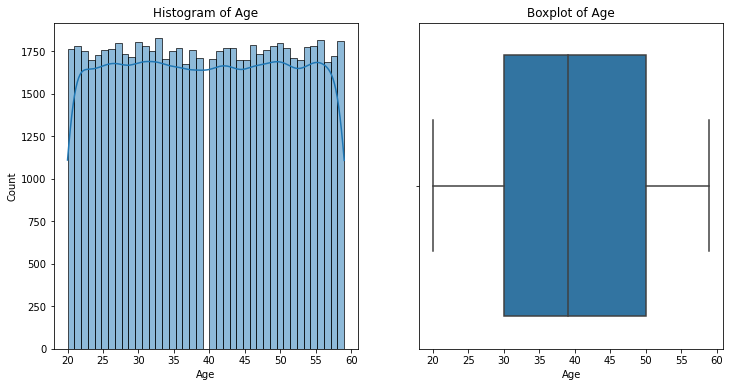

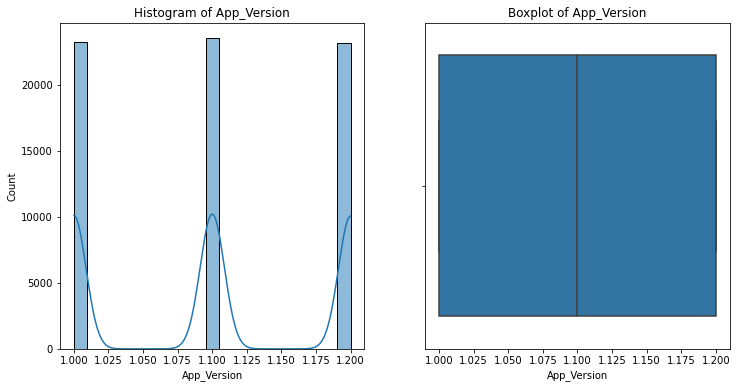

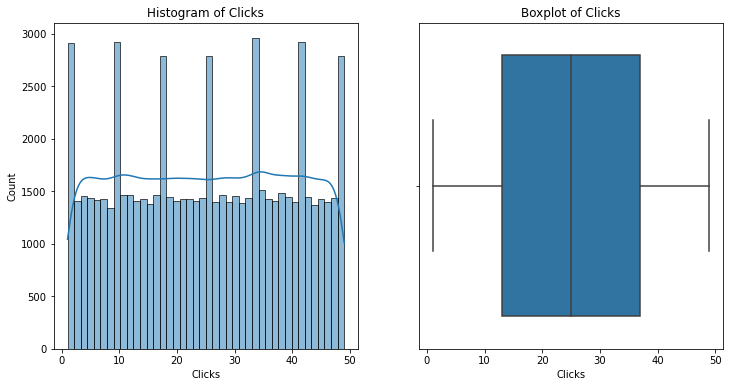

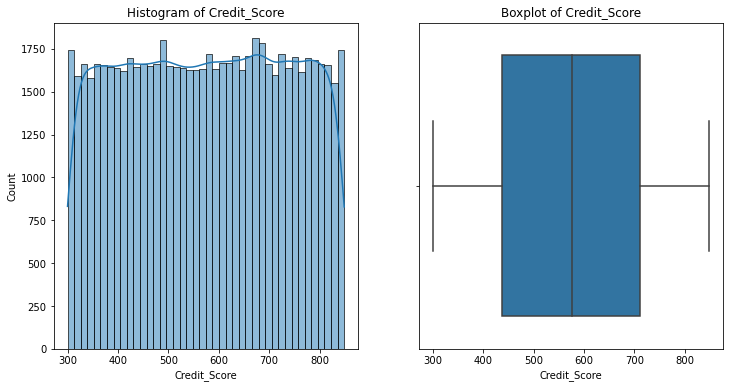

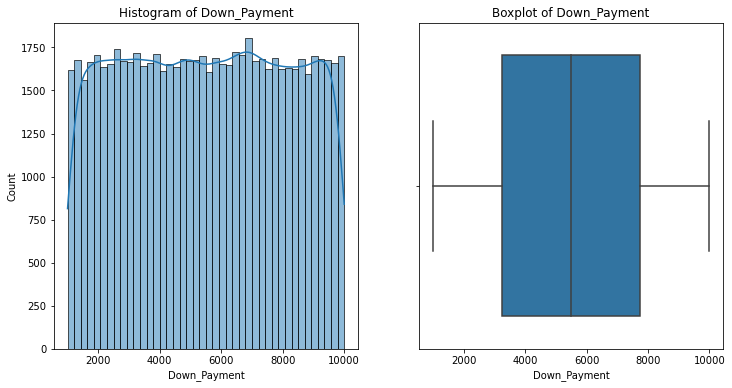

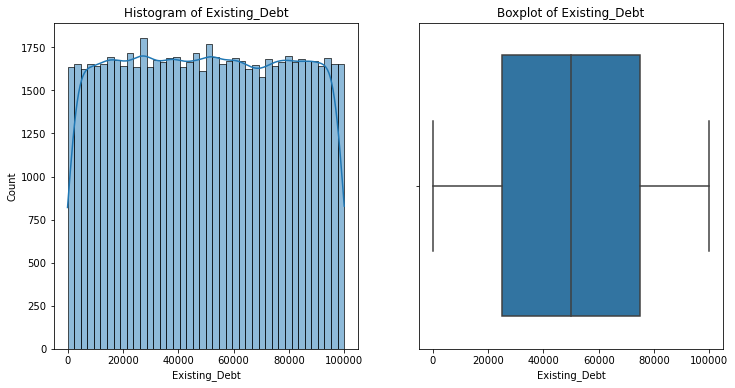

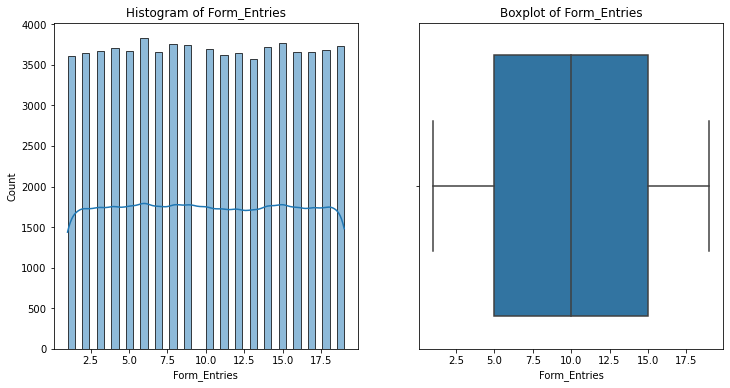

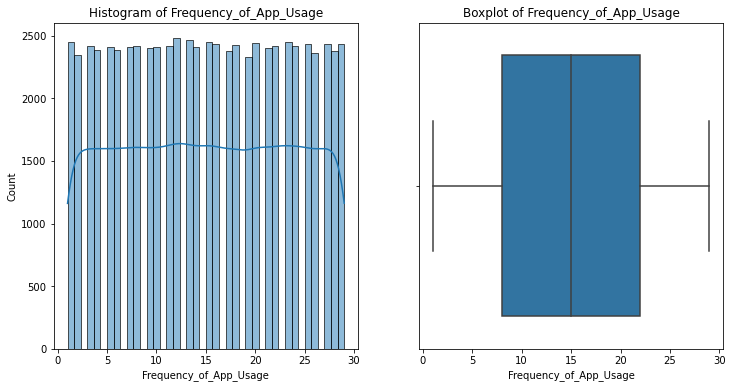

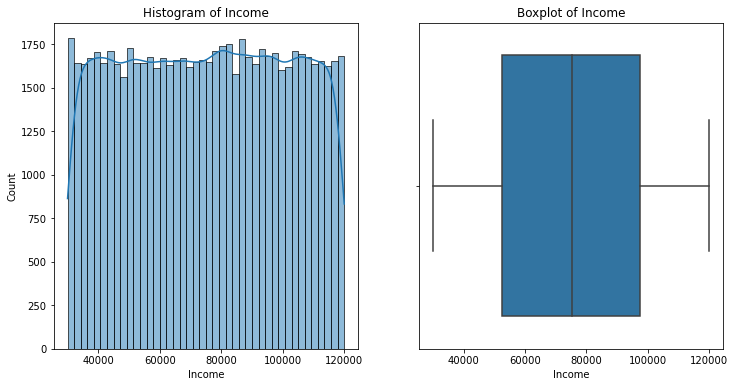

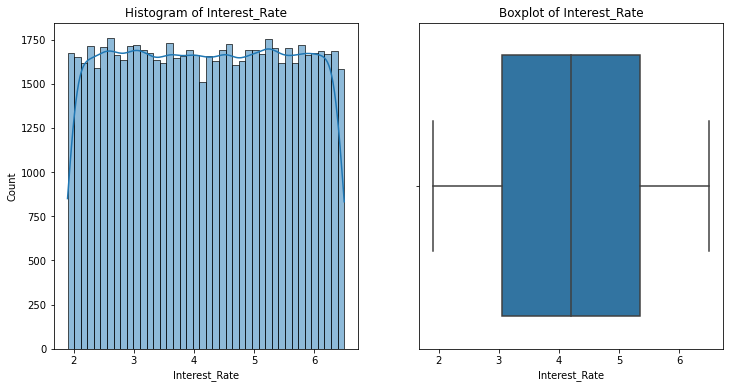

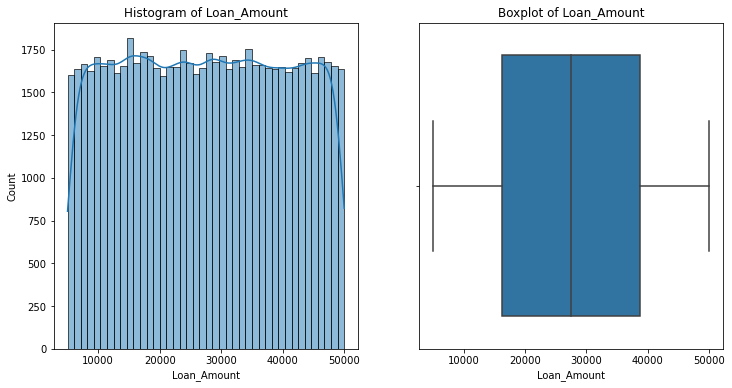

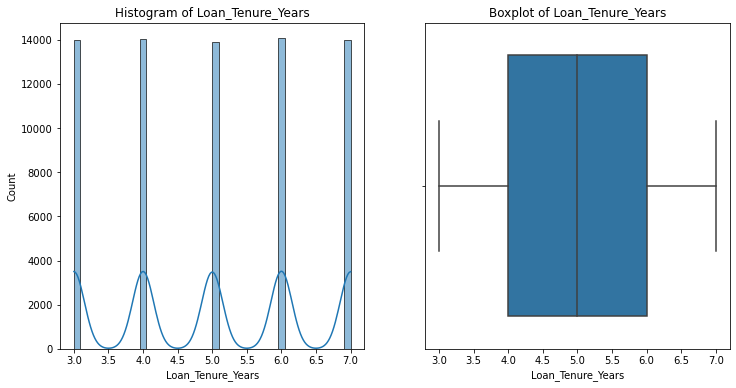

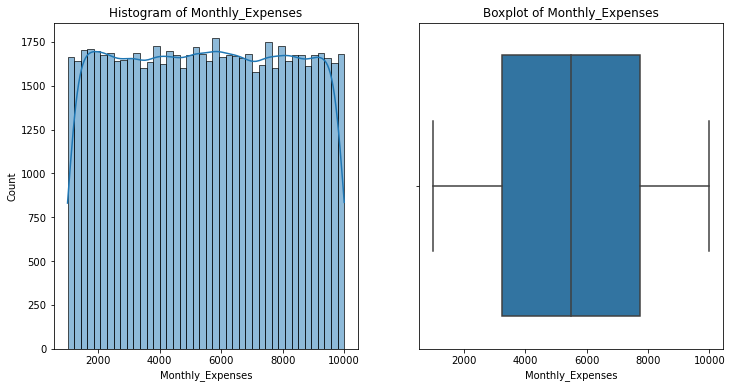

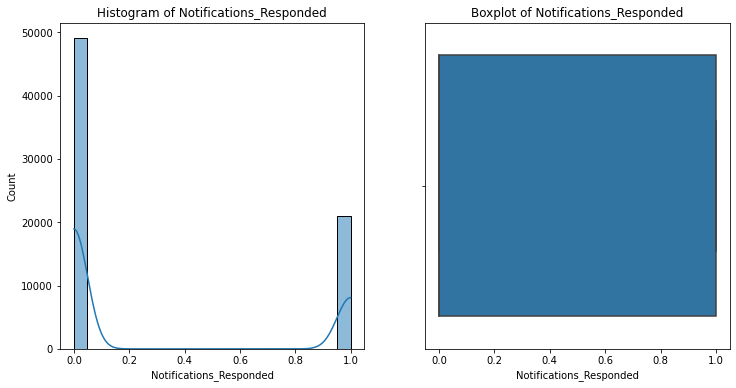

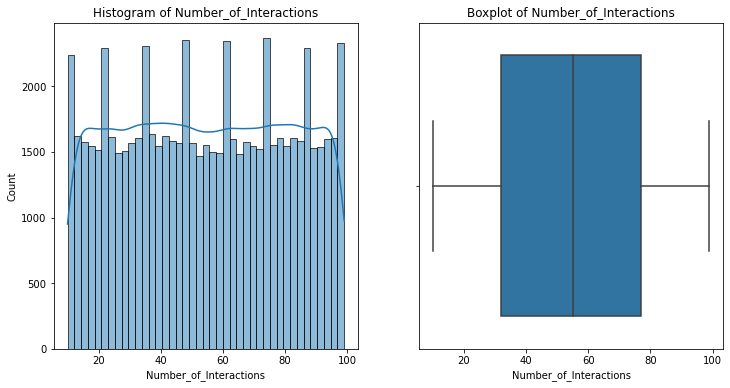

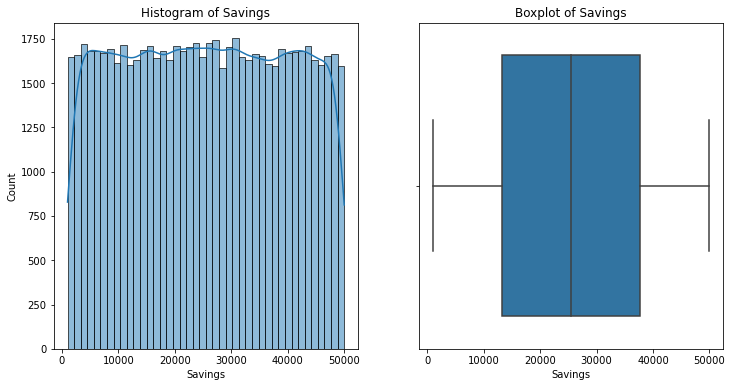

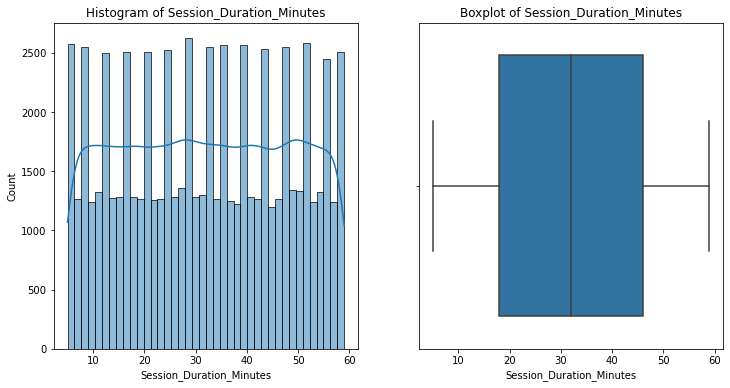

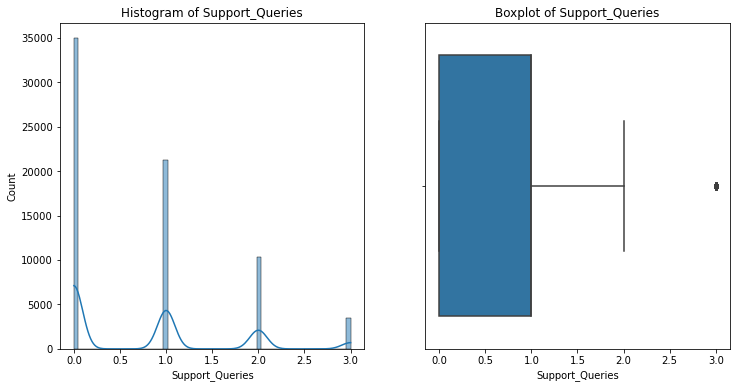

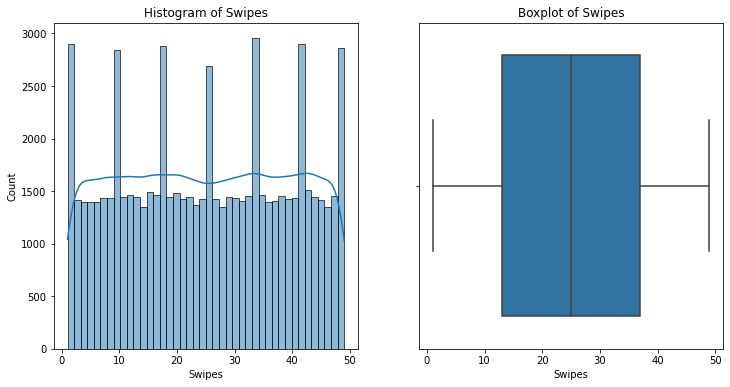

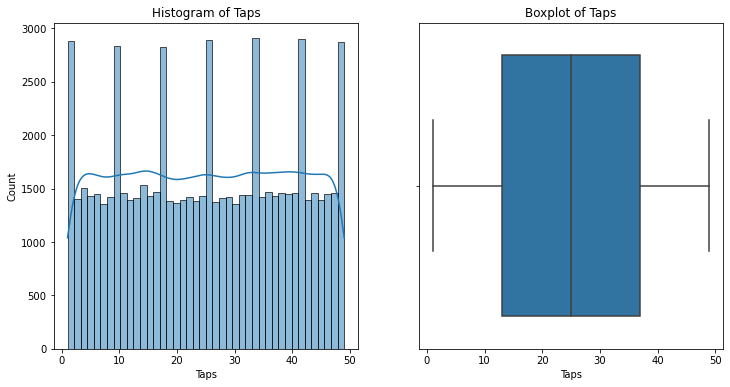

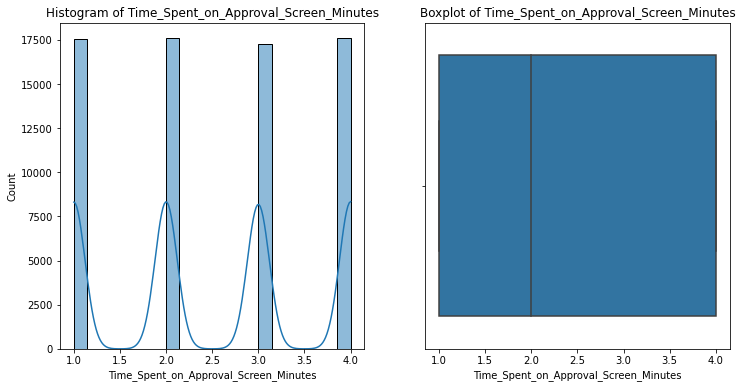

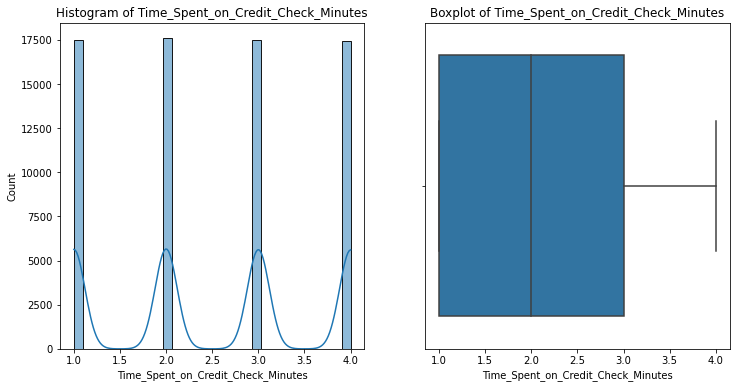

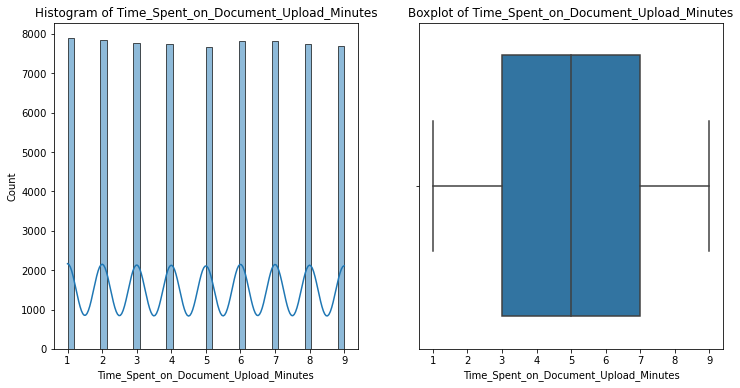

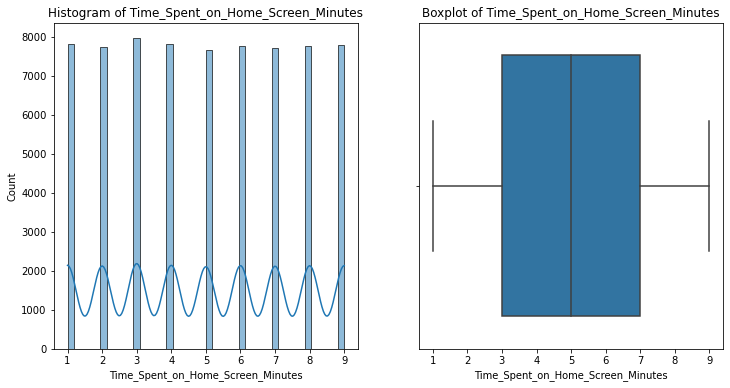

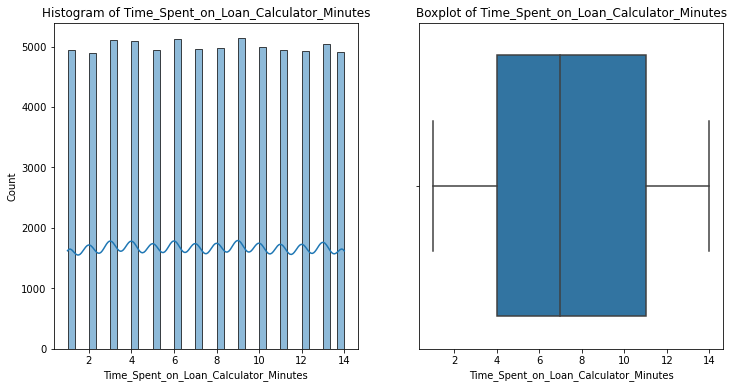

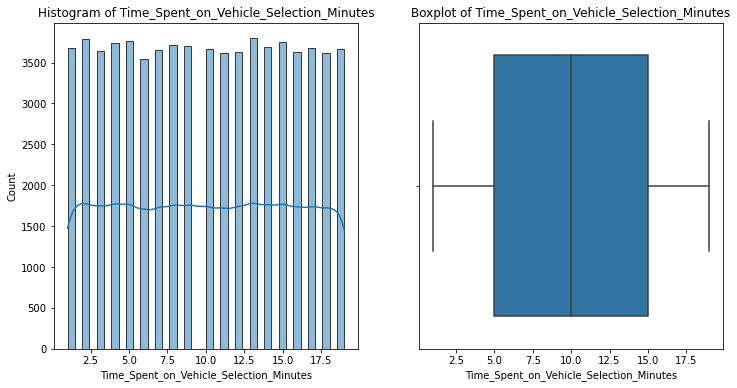

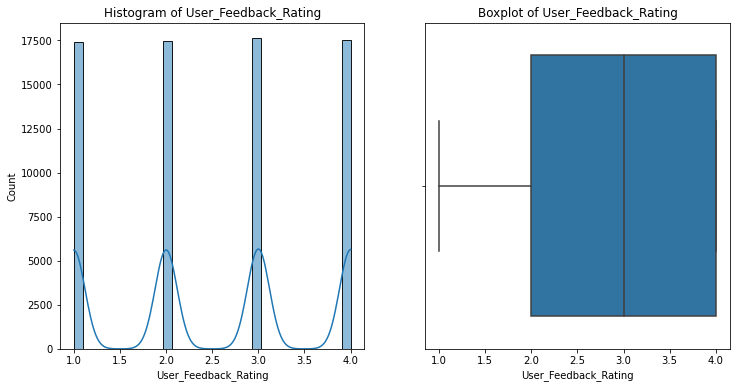

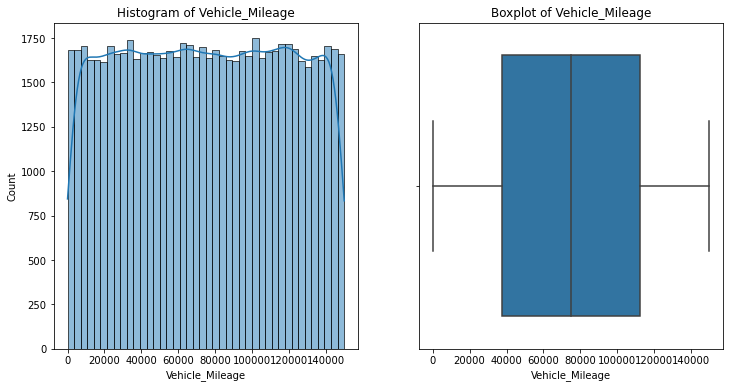

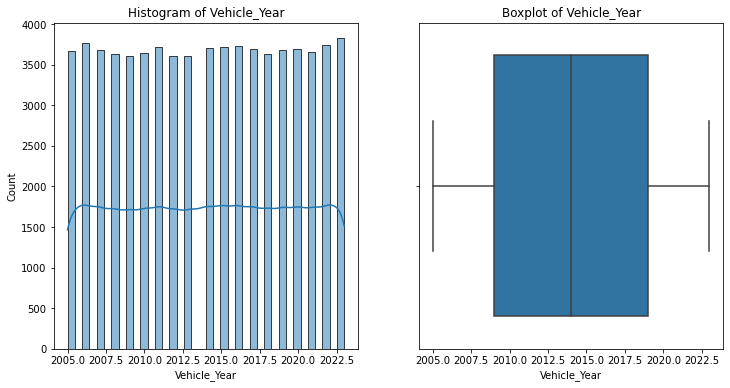

In [10]:

# Visualize int64 and float64 columns
for col in int_cols.union(float_cols):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(customer_loan[col], kde=True)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=customer_loan[col])
    plt.title(f'Boxplot of {col}')
    
    plt.show()

## Bool columns EDA

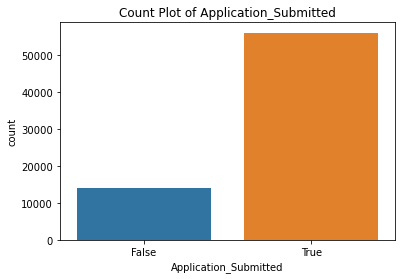

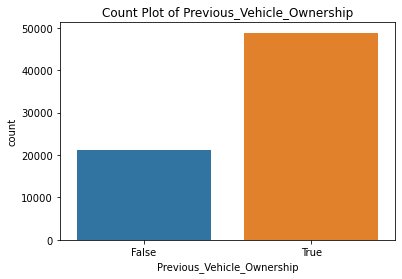

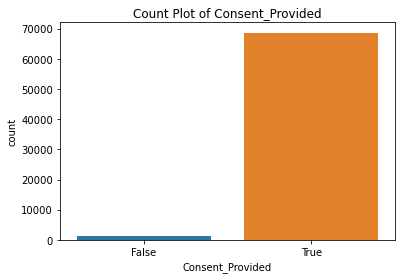

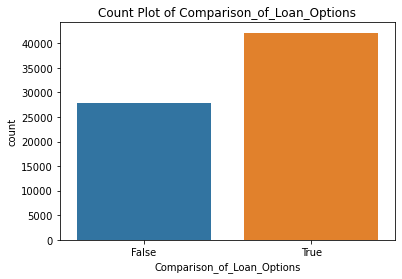

In [11]:
# Visualize bool columns
for col in bool_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=customer_loan[col])
    plt.title(f'Count Plot of {col}')
    plt.show()

## Object columns EDA

In [12]:
# # Visualize object columns
# for col in object_cols:
#     plt.figure(figsize=(12, 6))
#     sns.countplot(y=customer_loan[col], order=customer_loan[col].value_counts().index)
#     plt.title(f'Count Plot of {col}')
#     plt.show()

Skipping User_ID with 70000 unique values


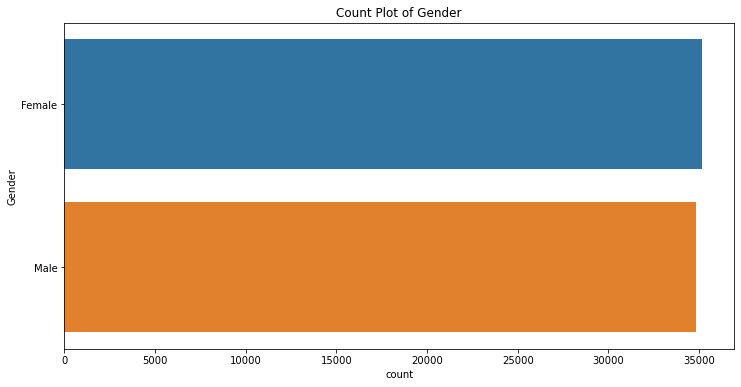

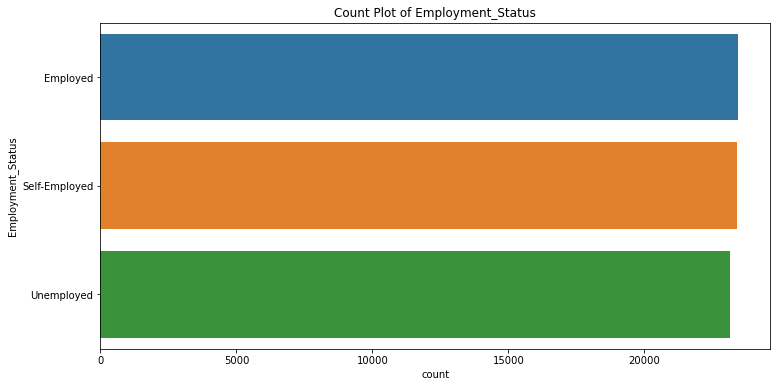

Skipping Location with 31278 unique values


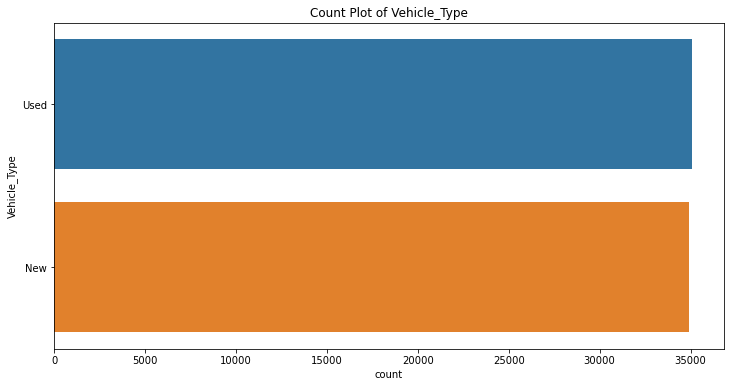

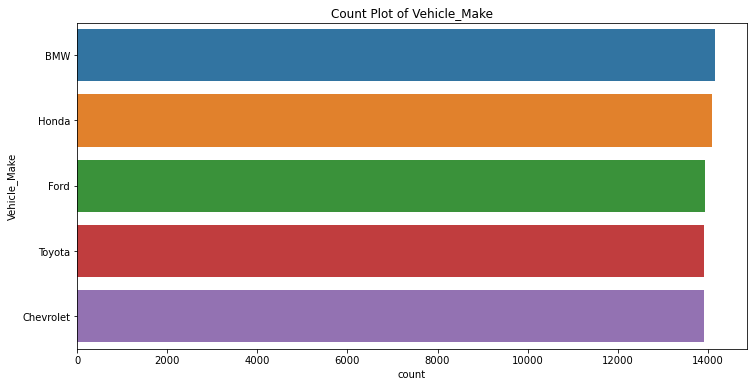

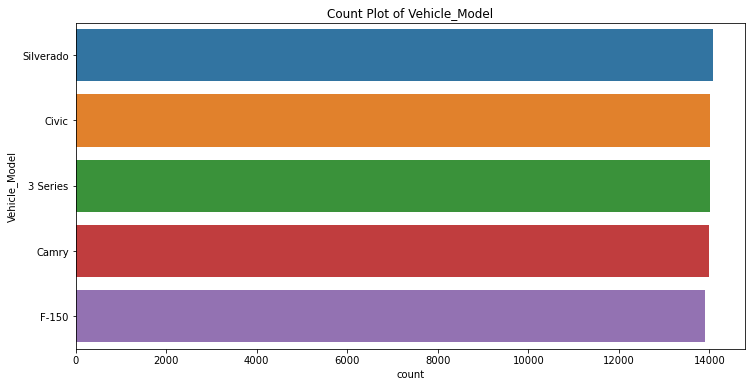

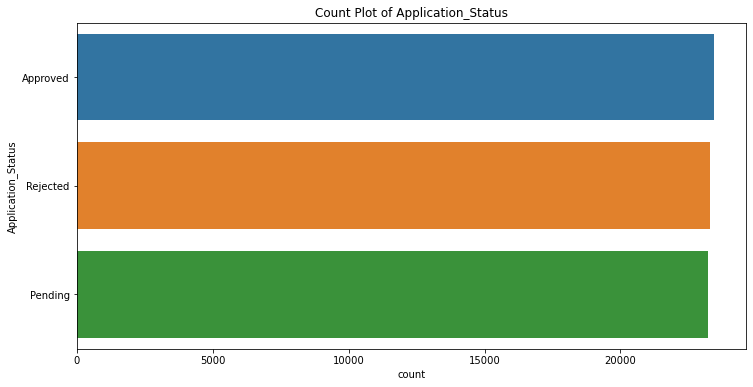

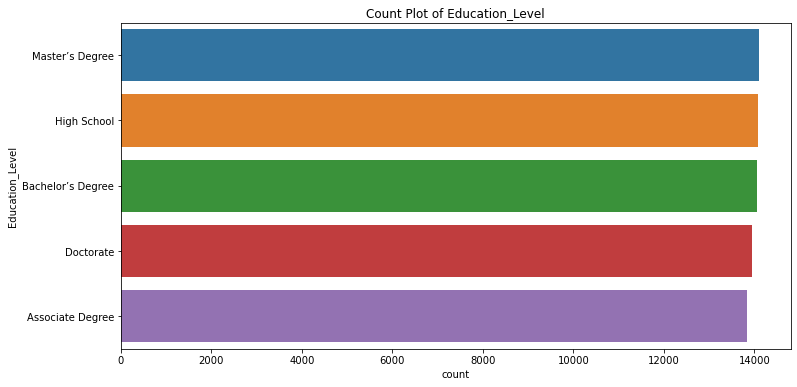

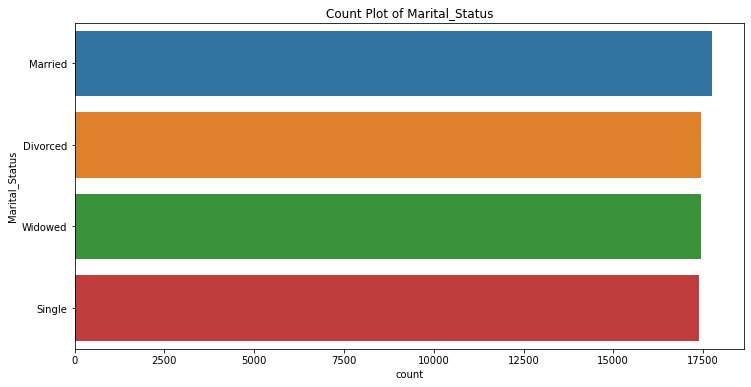

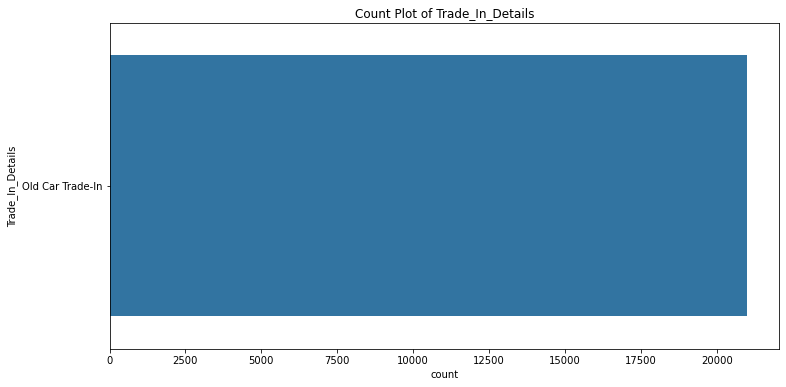

Skipping Navigation_Paths with 1920 unique values


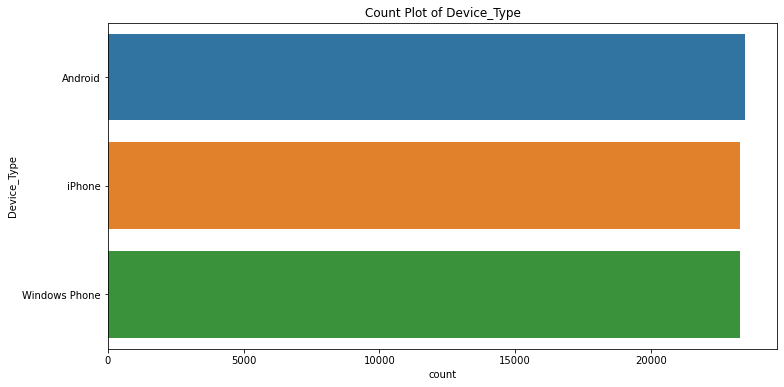

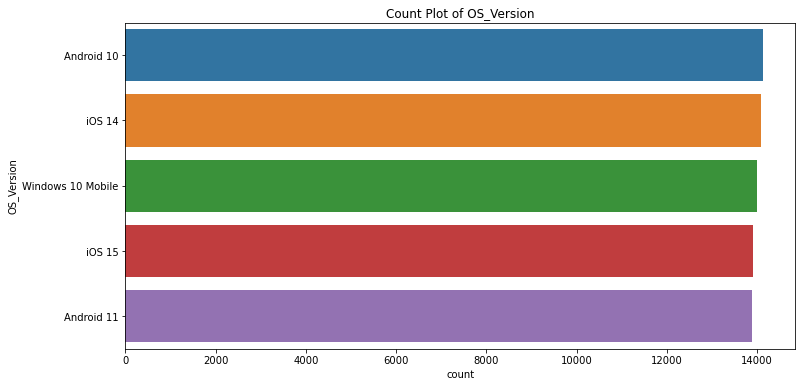

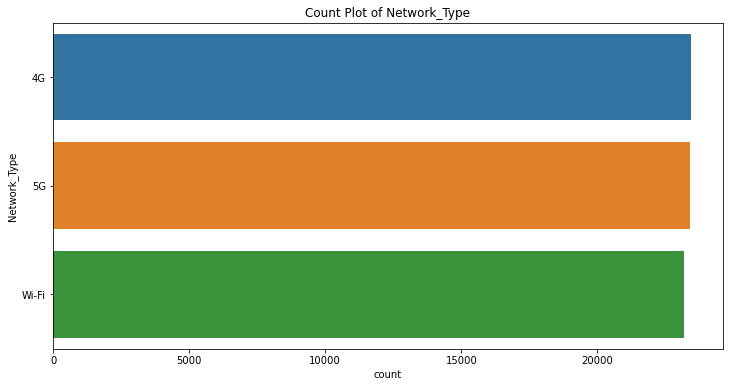

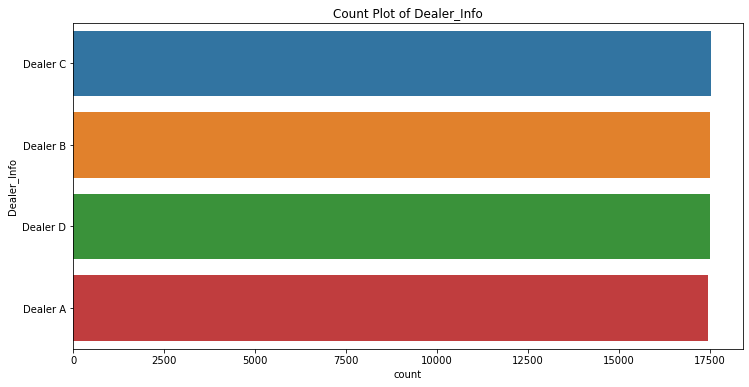

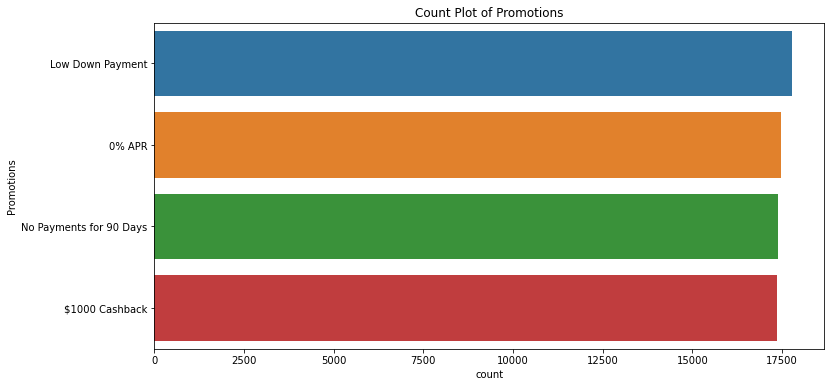

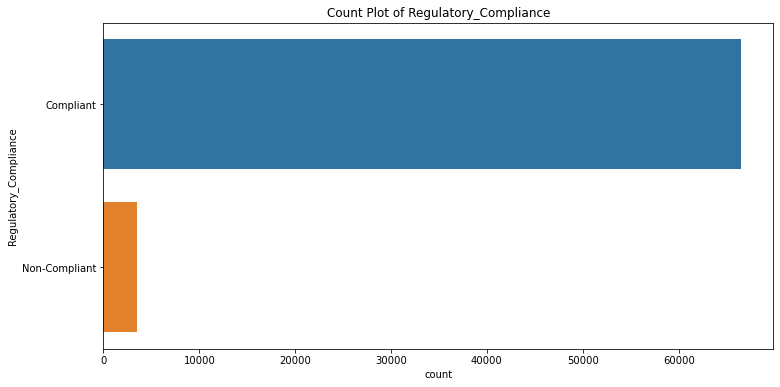

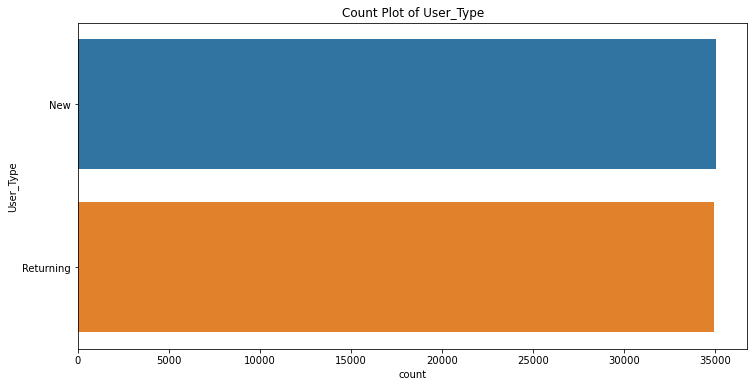

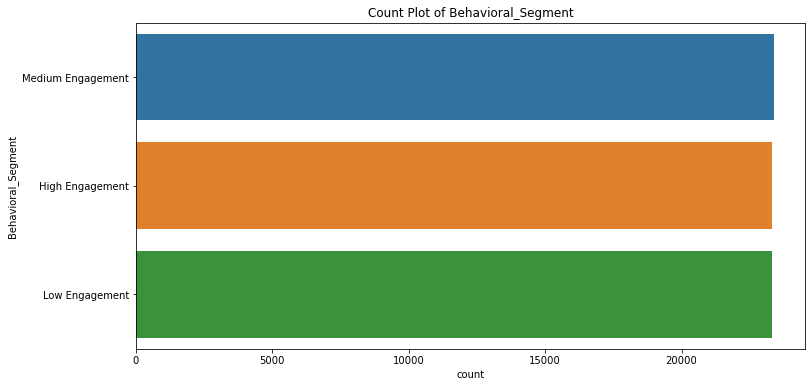

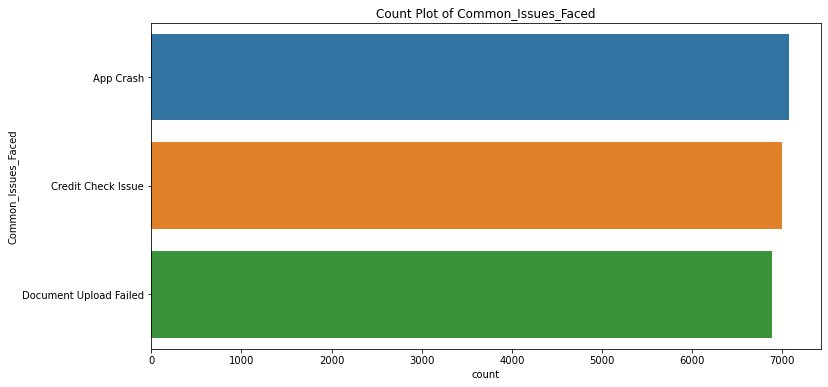

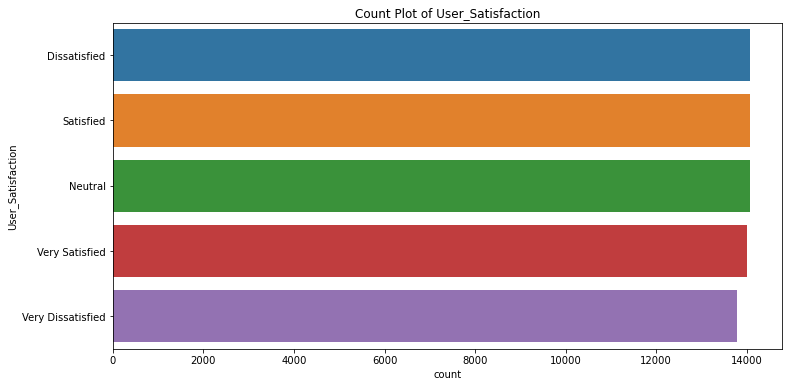

Skipping Common_Paths with 1920 unique values


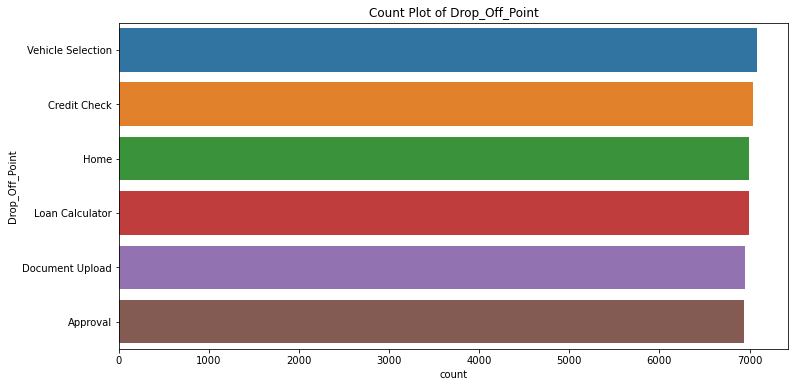

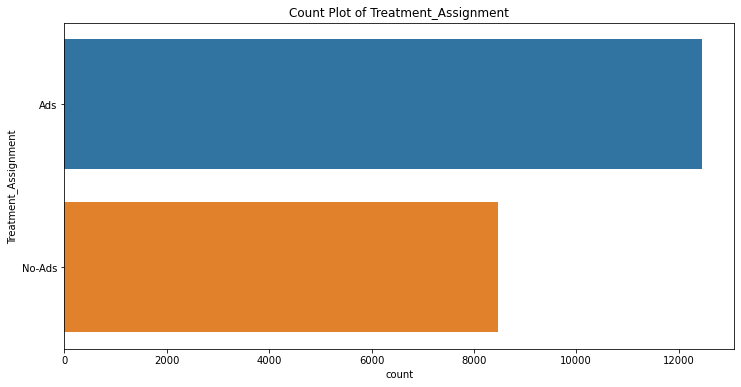

Skipping User_ID with 7000 unique values in sampled data


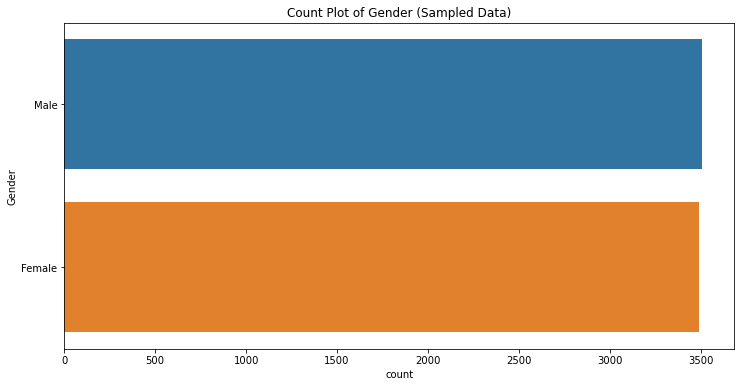

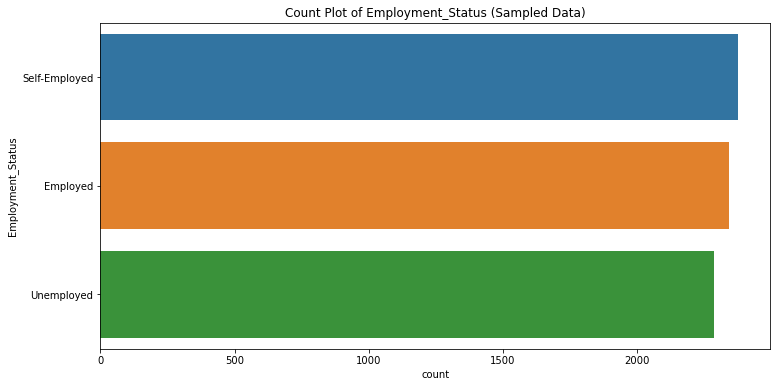

Skipping Location with 5673 unique values in sampled data


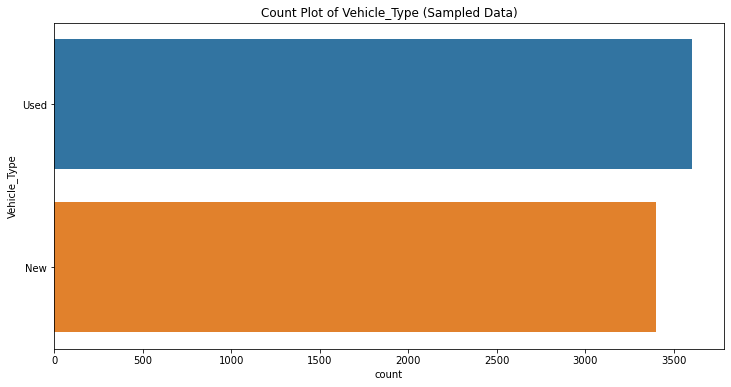

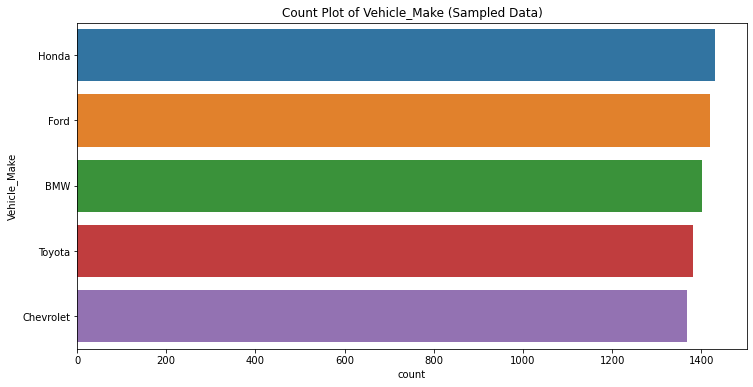

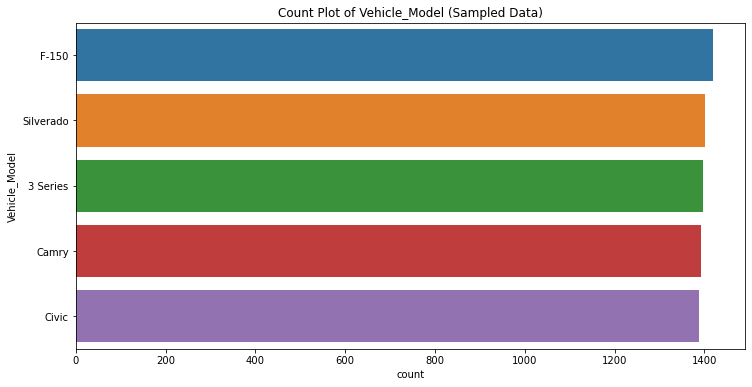

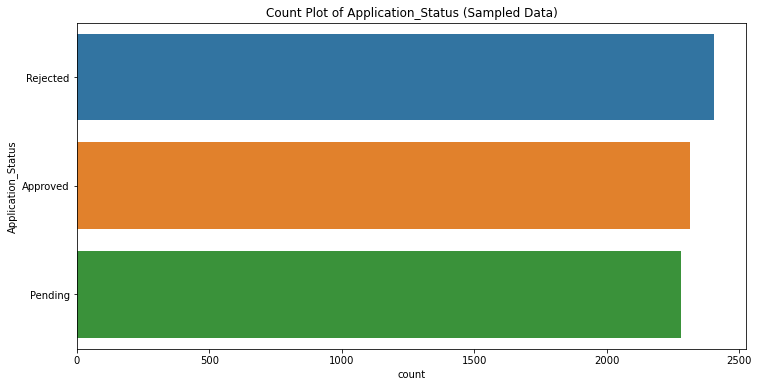

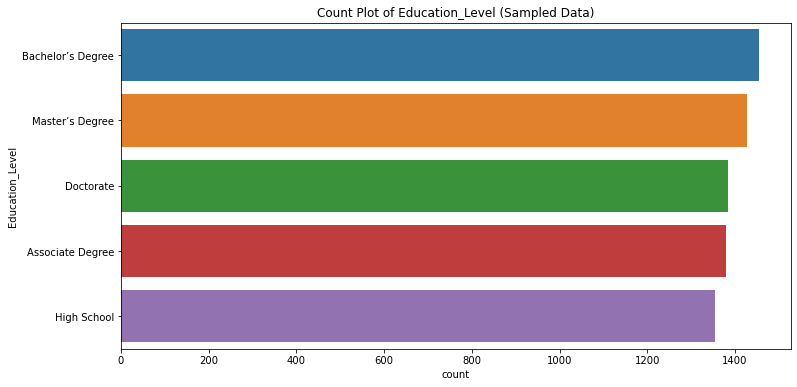

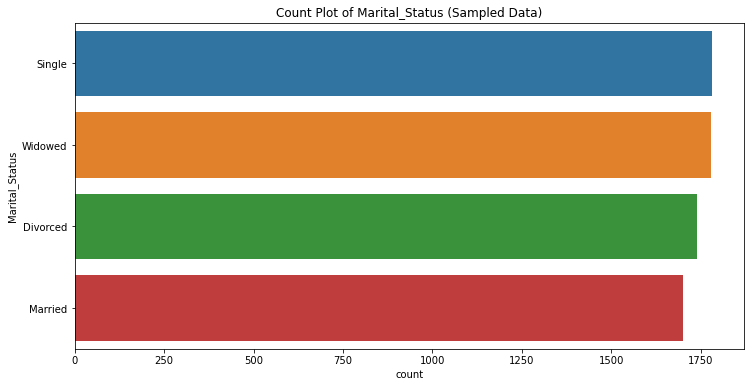

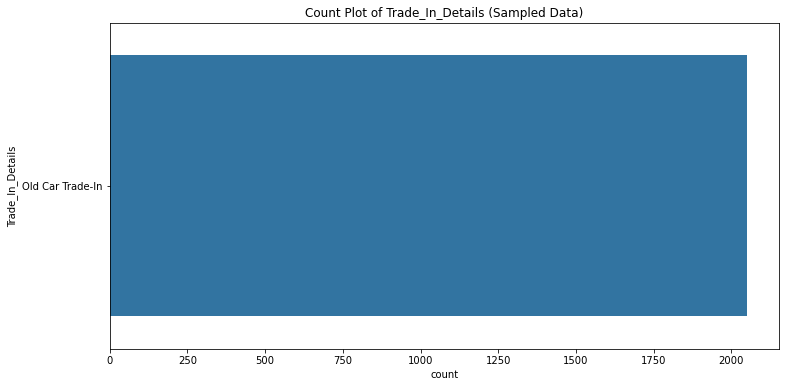

Skipping Navigation_Paths with 1788 unique values in sampled data


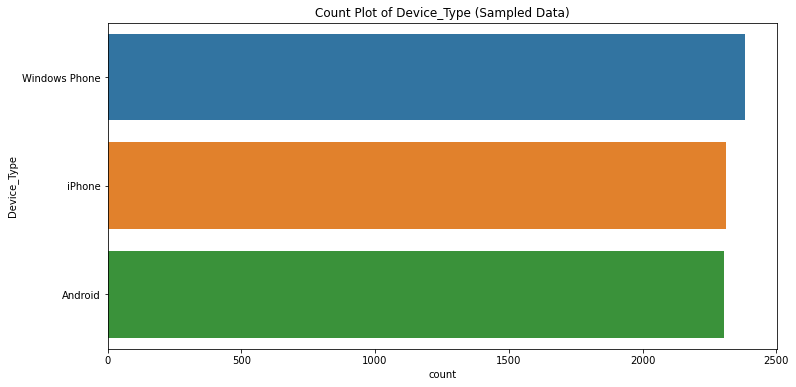

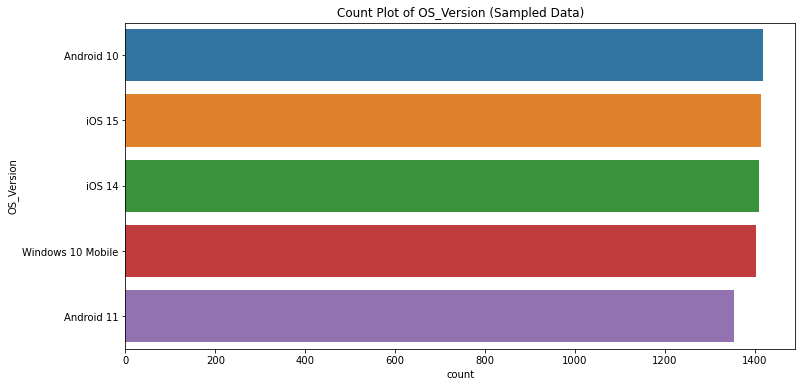

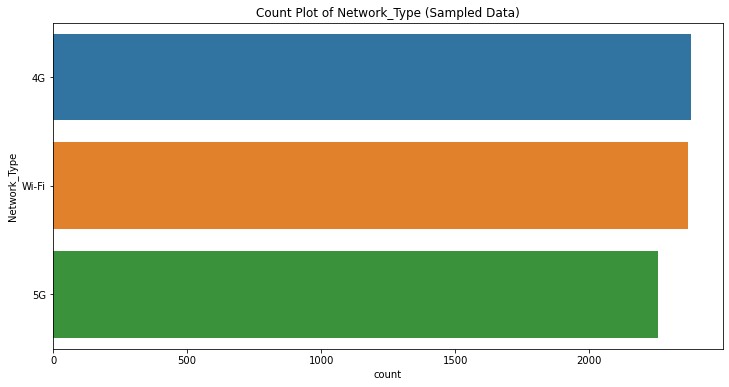

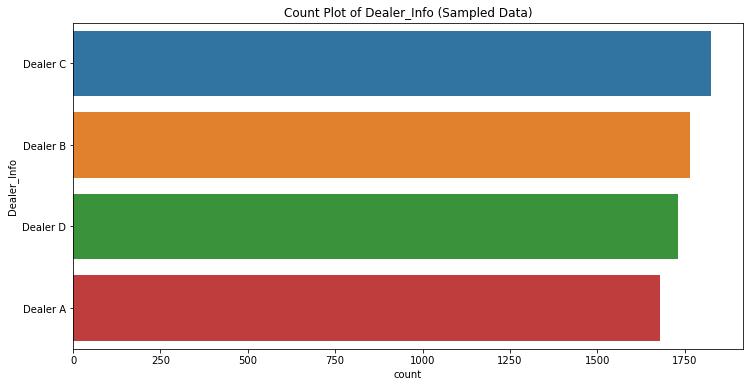

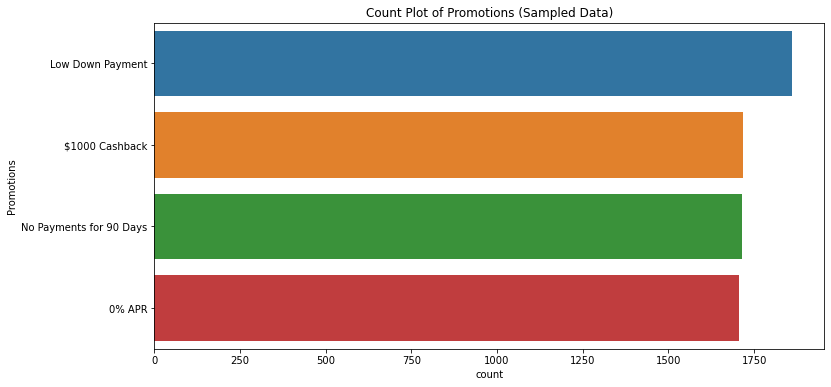

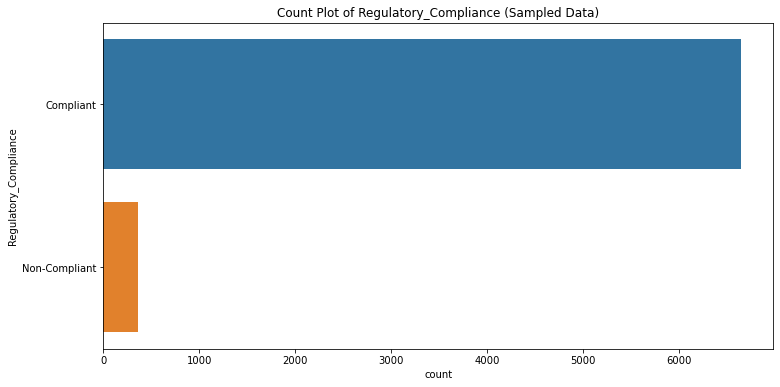

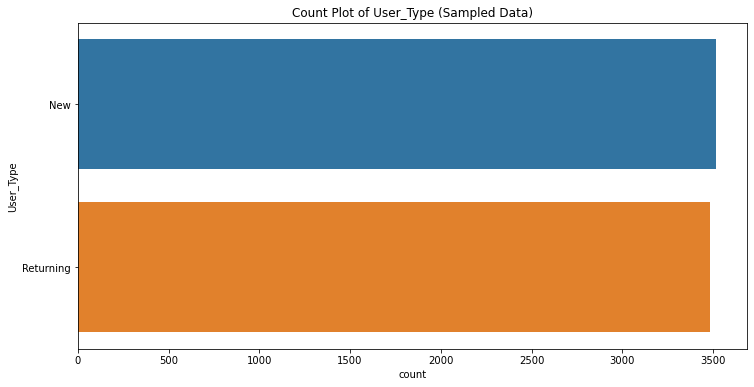

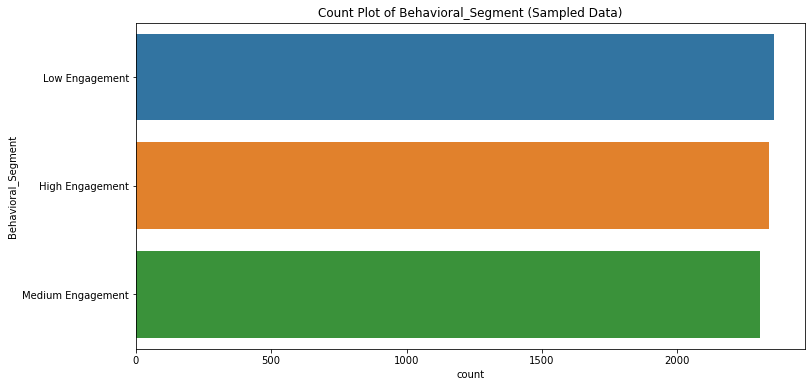

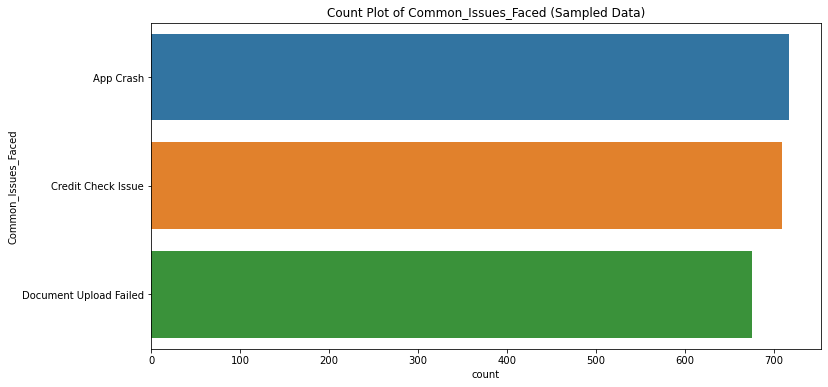

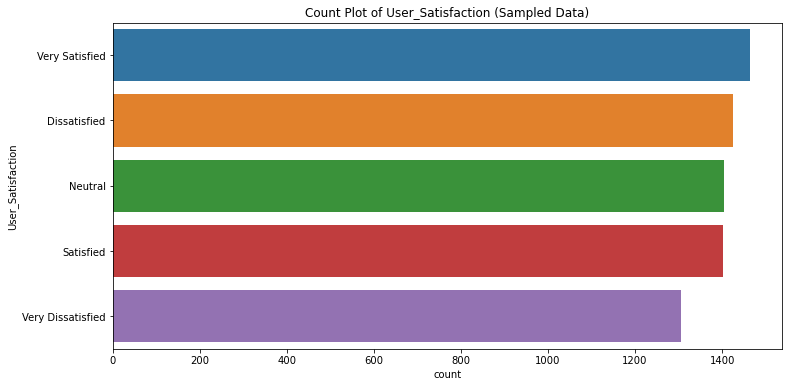

Skipping Common_Paths with 1774 unique values in sampled data


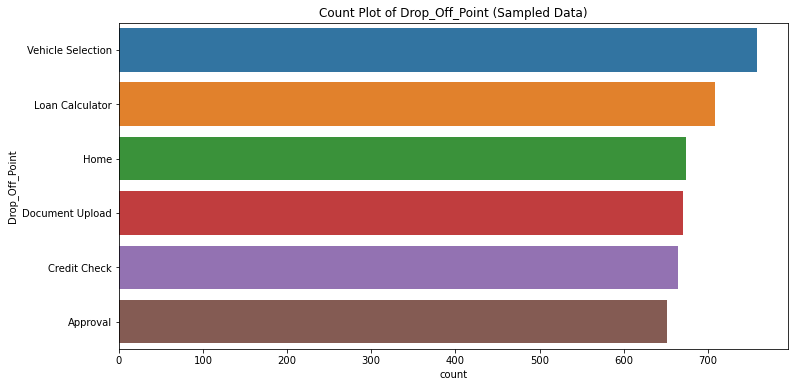

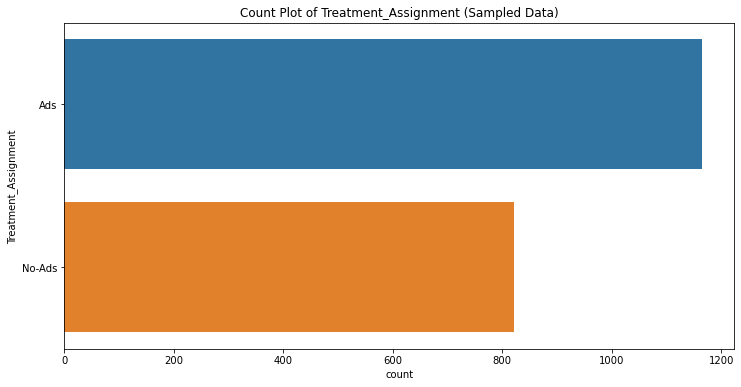

In [13]:
max_unique_values = 20

# Visualize object columns with a manageable number of unique values
for col in object_cols:
    unique_values = customer_loan[col].nunique()
    if unique_values <= max_unique_values:
        plt.figure(figsize=(12, 6))
        sns.countplot(y=customer_loan[col], order=customer_loan[col].value_counts().index)
        plt.title(f'Count Plot of {col}')
        plt.show()
    else:
        print(f'Skipping {col} with {unique_values} unique values')

# Alternatively, you can sample the data if the dataset is very large
sampled_data = customer_loan.sample(frac=0.1, random_state=1)  # Adjust the fraction as needed

for col in object_cols:
    unique_values = sampled_data[col].nunique()
    if unique_values <= max_unique_values:
        plt.figure(figsize=(12, 6))
        sns.countplot(y=sampled_data[col], order=sampled_data[col].value_counts().index)
        plt.title(f'Count Plot of {col} (Sampled Data)')
        plt.show()
    else:
        print(f'Skipping {col} with {unique_values} unique values in sampled data')

## Datetime columns EDA

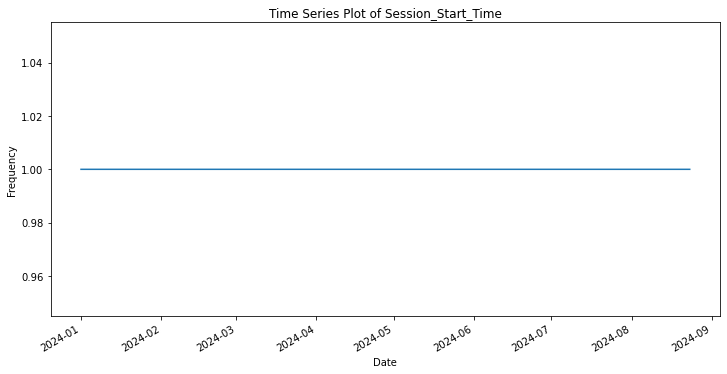

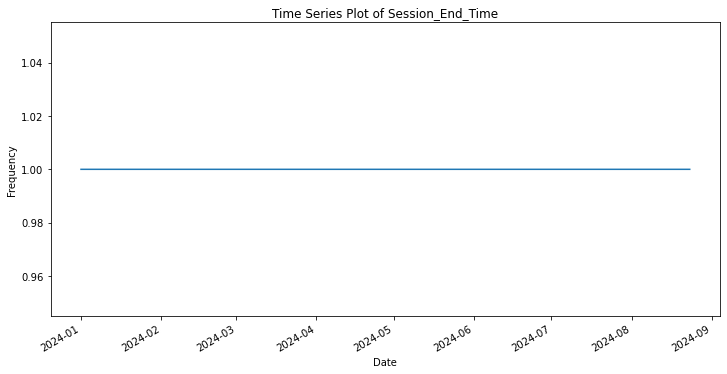

In [14]:
# Visualize datetime64[ns] columns
for col in datetime_cols:
    plt.figure(figsize=(12, 6))
    customer_loan[col].value_counts().sort_index().plot()
    plt.title(f'Time Series Plot of {col}')
    plt.xlabel('Date')
    plt.ylabel('Frequency')
    plt.show()

## Show that uniformly generated features will not work

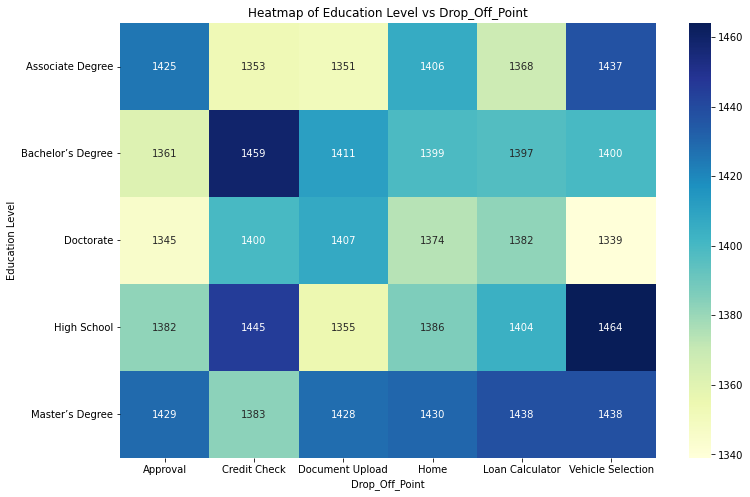

In [15]:
# Assuming customer_loan is your DataFrame
# Create a contingency table
contingency_table = pd.crosstab(customer_loan['Education_Level'], customer_loan['Drop_Off_Point'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Education Level vs Drop_Off_Point')
plt.xlabel('Drop_Off_Point')
plt.ylabel('Education Level')
plt.show()

## Suggestions for how to generate nonuniform features

In [16]:
import numpy as np
import pandas as pd

# Define the event sequence
event_sequence = ['Application Start', 'Vehicle Selection', 'Loan Calculator', 'Document Upload', 'Credit Check', 'Approval']

# Function to generate data
def generate_data(num_samples):
    data = []
    for _ in range(num_samples):
        credit_score = np.random.randint(300, 850)  # Generate a random credit score between 300 and 850
        events = []
        for i, event in enumerate(event_sequence):
            if i == 0:
                events.append(event)
            else:
                # Probability of moving to the next event increases with higher credit score
                prob = min(1, (credit_score - 300) / 550)  # Normalize credit score to a probability between 0 and 1
                if np.random.rand() < prob:
                    events.append(event)
                else:
                    break
        data.append({'Credit Score': credit_score, 'Events': events})
    return pd.DataFrame(data)

# Generate the data
num_samples = 1000
df = generate_data(num_samples)

# Display the first few rows of the generated data
print(df.head(50))

    Credit Score                                             Events
0            594                                [Application Start]
1            597  [Application Start, Vehicle Selection, Loan Ca...
2            660  [Application Start, Vehicle Selection, Loan Ca...
3            725  [Application Start, Vehicle Selection, Loan Ca...
4            459             [Application Start, Vehicle Selection]
5            492                                [Application Start]
6            617                                [Application Start]
7            372                                [Application Start]
8            717                                [Application Start]
9            346                                [Application Start]
10           775  [Application Start, Vehicle Selection, Loan Ca...
11           360                                [Application Start]
12           805  [Application Start, Vehicle Selection, Loan Ca...
13           798  [Application Start, Vehicle Se

In [17]:
df.columns

Index(['Credit Score', 'Events'], dtype='object')

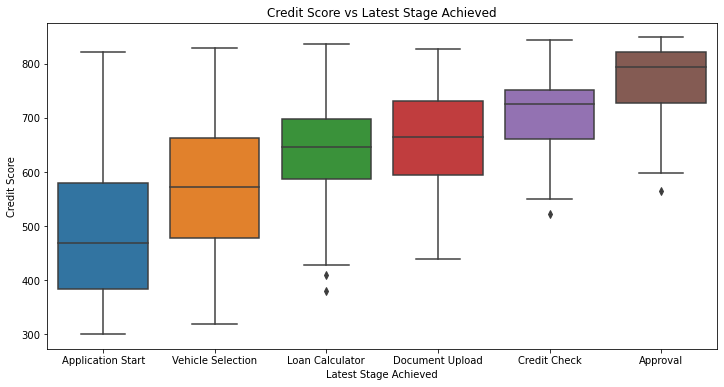

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame generated from the previous steps
# Calculate the latest stage achieved
df['Latest Stage'] = df['Events'].apply(lambda x: x[-1])

# Calculate the length of events
df['Event Length'] = df['Events'].apply(len)

# Visualize the relationship between credit score and latest stage achieved
plt.figure(figsize=(12, 6))
sns.boxplot(x='Latest Stage', y='Credit Score', data=df, order=event_sequence)
plt.title('Credit Score vs Latest Stage Achieved')
plt.xlabel('Latest Stage Achieved')
plt.ylabel('Credit Score')
plt.show()

# # Visualize the relationship between education level and length of events
# plt.figure(figsize=(12, 6))
# sns.barplot(x='Education Level', y='Event Length', data=df, order=education_levels)
# plt.title('Education Level vs Length of Events')
# plt.xlabel('Education Level')
# plt.ylabel('Length of Events')
# plt.show()

In [19]:

# Define the event sequence
event_sequences = ['Application Start', 'Vehicle Selection', 'Loan Calculator', 'Document Upload', 'Credit Check', 'Approval']

# Define education levels
education_levels = ['High School', 'Associate Degree', 'Bachelor’s Degree', 'Master’s Degree', 'Doctorate']

# Function to generate data
def generate_data(num_samples):
    data = []
    for _ in range(num_samples):
        education_level = np.random.choice(education_levels)  # Randomly select an education level
        education_index = education_levels.index(education_level)  # Get the index of the education level
        events = []
        for i, event in enumerate(event_sequences):
            if i == 0:
                events.append(event)
            else:
                # Probability of moving to the next event increases with higher education level
                prob = (education_index + 1) / len(education_levels)  # Normalize education index to a probability between 0 and 1
                if np.random.rand() < prob:
                    events.append(event)
                else:
                    break
        data.append({'Education Level': education_level, 'Events': events})
    return pd.DataFrame(data)

# Generate the data
num_samples = 1000
df = generate_data(num_samples)

# Display the first few rows of the generated data
print(df.head())

    Education Level                                             Events
0  Associate Degree                                [Application Start]
1   Master’s Degree  [Application Start, Vehicle Selection, Loan Ca...
2       High School                                [Application Start]
3  Associate Degree             [Application Start, Vehicle Selection]
4         Doctorate  [Application Start, Vehicle Selection, Loan Ca...


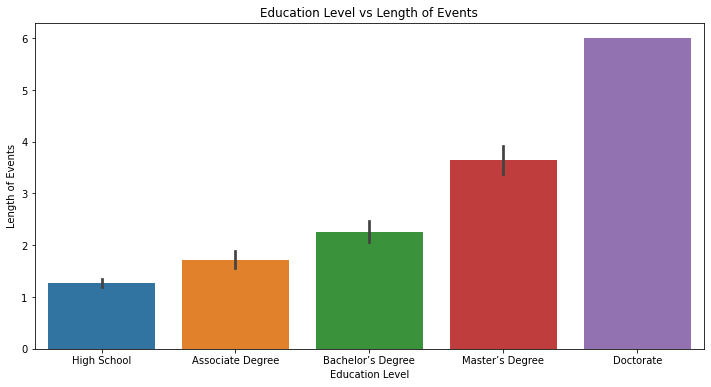

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df['Latest Stage'] = df['Events'].apply(lambda x: x[-1])
df['Event Length'] = df['Events'].apply(len)



# Visualize the relationship between education level and length of events
plt.figure(figsize=(12, 6))
sns.barplot(x='Education Level', y='Event Length', data=df, order=education_levels)
plt.title('Education Level vs Length of Events')
plt.xlabel('Education Level')
plt.ylabel('Length of Events')
plt.show()

## Select a subset of columns and apply the above process

In [108]:
customer_loan['Loan_Tenure_Years'].describe()

count    70000.000000
mean         5.000071
std          1.414259
min          3.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          7.000000
Name: Loan_Tenure_Years, dtype: float64

In [7]:
customer_loan.head()

,User_ID,Age,Gender,Income,Employment_Status,Credit_Score,Location,Vehicle_Type,Vehicle_Make,Vehicle_Model,Vehicle_Year,Vehicle_Mileage,Loan_Amount,Down_Payment,Loan_Tenure_Years,Interest_Rate,Application_Status,Session_Duration_Minutes,Number_of_Interactions,Notifications_Responded,Support_Queries,Application_Submitted,Education_Level,Marital_Status,Existing_Debt,Monthly_Expenses,Savings,Previous_Vehicle_Ownership,Trade_In_Details,Session_Start_Time,Session_End_Time,Navigation_Paths,Device_Type,OS_Version,App_Version,Network_Type,Dealer_Info,Promotions,Regulatory_Compliance,Consent_Provided,User_Type,Behavioral_Segment,User_Feedback_Rating,Common_Issues_Faced,User_Satisfaction,Frequency_of_App_Usage,Clicks,Taps,Swipes,Form_Entries,Time_Spent_on_Home_Screen_Minutes,Time_Spent_on_Loan_Calculator_Minutes,Time_Spent_on_Vehicle_Selection_Minutes,Time_Spent_on_Document_Upload_Minutes,Time_Spent_on_Credit_Check_Minutes,Time_Spent_on_Approval_Screen_Minutes,Common_Paths,Drop_Off_Point,Comparison_of_Loan_Options,Treatment_Assignment
0,57e0fc22-4768-4d0c-89cc-56505b848fdd,45,Male,109413,Unemployed,328,Davidberg,New,Honda,Civic,2022,92672,13014,3541,4,5.02,Approved,51,57,0,1,True,Doctorate,Divorced,11155,9384,22580,True,NaN,2024-01-02 05:17:36.602267,2024-04-15 06:42:08.343449,"['Approval', 'Document Upload', 'Loan Calculat...",Windows Phone,Android 10,1.0,4G,Dealer D,Low Down Payment,Compliant,True,New,Medium Engagement,3,NaN,Neutral,16,22,1,43,18,8,3,4,2,3,2,"['Loan Calculator', 'Home', 'Vehicle Selection...",Approval,True,Ads
1,36bca6e0-f1e9-4b86-8a42-b6c0150d2f66,29,Male,62352,Unemployed,657,Kimberlyfort,Used,BMW,Civic,2022,148471,7381,8146,6,5.02,Pending,13,49,0,1,True,Bachelor’s Degree,Divorced,85313,7815,35430,True,Old Car Trade-In,2024-02-15 22:54:07.623011,2024-01-04 08:48:37.507220,"['Vehicle Selection', 'Credit Check', 'Applica...",iPhone,Android 11,1.2,Wi-Fi,Dealer B,$1000 Cashback,Compliant,True,New,High Engagement,2,NaN,Very Satisfied,9,9,36,39,12,8,11,17,6,3,1,"['Vehicle Selection', 'Approval', 'Credit Chec...",NaN,False,NaN
2,6b63ba7a-0945-4434-96f8-a1d80ee62e12,55,Female,44625,Self-Employed,794,Bennettton,Used,Toyota,3 Series,2014,18361,26026,9602,3,5.61,Approved,41,20,0,1,True,Doctorate,Married,64180,1704,27442,False,NaN,2024-03-21 16:09:12.400416,2024-06-14 03:46:40.433993,"['Loan Calculator', 'Approval', 'Document Uplo...",iPhone,Android 11,1.2,4G,Dealer B,Low Down Payment,Compliant,True,New,High Engagement,1,Credit Check Issue,Dissatisfied,21,32,5,41,18,9,8,19,3,3,1,"['Vehicle Selection', 'Document Upload', 'Cred...",Credit Check,False,Ads
3,725ccb8c-9d84-443b-b3a6-9d72f250ac7a,48,Male,35029,Unemployed,587,Donnaville,New,Toyota,Civic,2013,69080,17411,7606,5,4.40,Rejected,24,25,0,0,True,Bachelor’s Degree,Widowed,3229,1170,15989,True,NaN,2024-03-28 20:50:57.514477,2024-08-07 21:05:42.803205,"['Application Start', 'Credit Check', 'Approva...",Windows Phone,Windows 10 Mobile,1.1,5G,Dealer D,0% APR,Compliant,True,New,High Engagement,2,App Crash,Satisfied,16,10,43,33,10,1,4,10,6,1,1,"['Home', 'Credit Check', 'Loan Calculator', 'A...",NaN,True,NaN
4,7edac706-badf-4221-af6b-fbe7e7b54bec,23,Male,49594,Self-Employed,309,Mcdonaldberg,Used,Ford,Civic,2018,23104,40281,4811,5,4.02,Rejected,13,30,0,2,False,Associate Degree,Widowed,40696,5192,16677,False,NaN,2024-05-16 06:16:55.586742,2024-01-07 05:20:56.658449,"['Credit Check', 'Loan Calculator', 'Approval']",Android,Android 11,1.2,5G,Dealer B,0% APR,Compliant,True,Returning,Medium Engagement,2,App Crash,Neutral,7,32,6,35,18,8,9,5,4,3,1,"['Home', 'Vehicle Selection', 'Approval']",NaN,False,NaN


In [59]:
customer_loan['Marital_Status'].unique()

array(['Divorced', 'Married', 'Widowed', 'Single'], dtype=object)

### Features chosen
- Credit_Score V
- Education_Level V
- Marital status V
- Age V
- Vehicle_Year V
- Loan_Amount V
- Down_Payment V
- Loan_Tenure_Years V
- Interest_Rate V
- Application_Status? X
- Session_Duration_Minutes V
- Number_of_Interactions V

- Treatment_Assignment


Keep!
- Session_Start_Time
- Session_End_Time

- Start with generating data based off credit score and fix the last_event+event length for consistency of future generations

In [5]:
# import numpy as np
# import pandas as pd

# # Define the event sequence
# event_sequence = ['Application Start', 'Vehicle Selection', 'Loan Calculator', 'Document Upload', 'Credit Check', 'Approval']

# # Function to generate data
# def generate_credit_score(num_samples):
#     data = []
#     for _ in range(num_samples):
#         credit_score = np.random.randint(300, 850)  # Generate a random credit score between 300 and 850
#         events = []
#         for i, event in enumerate(event_sequence):
#             if i == 0:
#                 events.append(event)
#             else:
#                 # Probability of moving to the next event increases with higher credit score
#                 prob = min(1, (credit_score - 300) / 550)  # Normalize credit score to a probability between 0 and 1
#                 if np.random.rand() < prob:
#                     events.append(event)
#                 else:
#                     break
#         data.append({'Credit Score': credit_score, 'Events': events})
#     return pd.DataFrame(data)

# # Generate the data
# num_samples = 72000
# customer_data = generate_credit_score(num_samples)
# customer_data['Latest Stage'] = customer_data['Events'].apply(lambda x: x[-1])

# # Calculate the length of events
# customer_data['Event Length'] = customer_data['Events'].apply(len)
# # Display the first few rows of the generated data
# print(customer_data.head(10))
# new_customer_data = customer_data.copy()

   Credit Score                                             Events  \
0           465                                [Application Start]   
1           454                                [Application Start]   
2           699                                [Application Start]   
3           566  [Application Start, Vehicle Selection, Loan Ca...   
4           525  [Application Start, Vehicle Selection, Loan Ca...   
5           711             [Application Start, Vehicle Selection]   
6           444                                [Application Start]   
7           797             [Application Start, Vehicle Selection]   
8           599                                [Application Start]   
9           464             [Application Start, Vehicle Selection]   

        Latest Stage  Event Length  
0  Application Start             1  
1  Application Start             1  
2  Application Start             1  
3    Loan Calculator             3  
4       Credit Check             5  
5  Vehi

In [50]:
import numpy as np
import pandas as pd

# Define the event sequence
event_sequence = ['Application Start', 'Vehicle Selection', 'Loan Calculator', 'Document Upload', 'Credit Check', 'Approval']

# Function to generate data
def cogenerate_credscore_sequence_treatment(num_samples):
    data = []
    for _ in range(num_samples):
        credit_score = np.random.randint(300, 850)  # Generate a random credit score between 300 and 850
        events = []
        treatment = 0  # Default treatment value
        
        for i, event in enumerate(event_sequence):
            if i == 0:
                events.append(event)
            else:
                # Probability of moving to the next event increases with higher credit score
                prob = min(1, (credit_score - 300) / 550)  # Normalize credit score to a probability between 0 and 1
                if np.random.rand() < prob:
                    events.append(event)
                else:
                    break

        # Determine treatment assignment:OK, should probably move to new func
        if 'Loan Calculator' in events or 'Document Upload' in events or 'Credit Check' in events or 'Approval' in events:
            treatment = 1 if np.random.rand() < 0.9 else 0  # 80% chance of treatment for these events
        else:
            treatment = 1 if np.random.rand() < 0.3 else 0  # 50% chance of treatment for other events
        
        data.append({'Credit Score': credit_score, 'Events': events, 'Treatment': treatment})
    
    return pd.DataFrame(data)

# Example usage
num_samples = 72000
customer_data = cogenerate_credscore_sequence_treatment(num_samples)
customer_data['Latest Stage'] = customer_data['Events'].apply(lambda x: x[-1])

# Calculate the length of events
customer_data['Event Length'] = customer_data['Events'].apply(len)
# Display the first few rows of the generated data
print(customer_data.head(10))
new_customer_data = customer_data.copy()

   Credit Score                                             Events  Treatment  \
0           516  [Application Start, Vehicle Selection, Loan Ca...          0   
1           483                                [Application Start]          0   
2           760  [Application Start, Vehicle Selection, Loan Ca...          0   
3           835  [Application Start, Vehicle Selection, Loan Ca...          1   
4           390                                [Application Start]          0   
5           525                                [Application Start]          0   
6           464                                [Application Start]          0   
7           666                                [Application Start]          1   
8           697  [Application Start, Vehicle Selection, Loan Ca...          1   
9           716             [Application Start, Vehicle Selection]          0   

        Latest Stage  Event Length  
0       Credit Check             5  
1  Application Start             1

<AxesSubplot:>

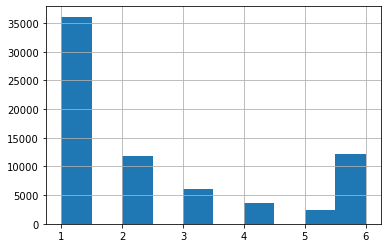

In [51]:
customer_data['Event Length'].hist()

<AxesSubplot:>

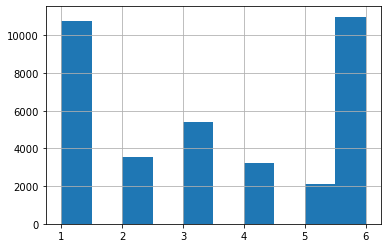

In [52]:
customer_data.loc[customer_data.Treatment==1,'Event Length'].hist()

<AxesSubplot:>

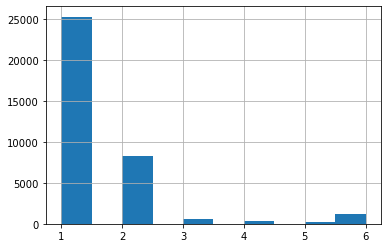

In [53]:
customer_data.loc[customer_data.Treatment==0,'Event Length'].hist()

In [54]:
customer_data.Treatment.value_counts()

1    36028
0    35972
Name: Treatment, dtype: int64

In [55]:
customer_data.head()

,Credit Score,Events,Treatment,Latest Stage,Event Length
0,516,"[Application Start, Vehicle Selection, Loan Ca...",0,Credit Check,5
1,483,[Application Start],0,Application Start,1
2,760,"[Application Start, Vehicle Selection, Loan Ca...",0,Credit Check,5
3,835,"[Application Start, Vehicle Selection, Loan Ca...",1,Document Upload,4
4,390,[Application Start],0,Application Start,1


In [56]:
customer_data['Event Length'].corr(customer_data['Treatment'])

0.5118690671238523

In [57]:
customer_data=new_customer_data.copy()

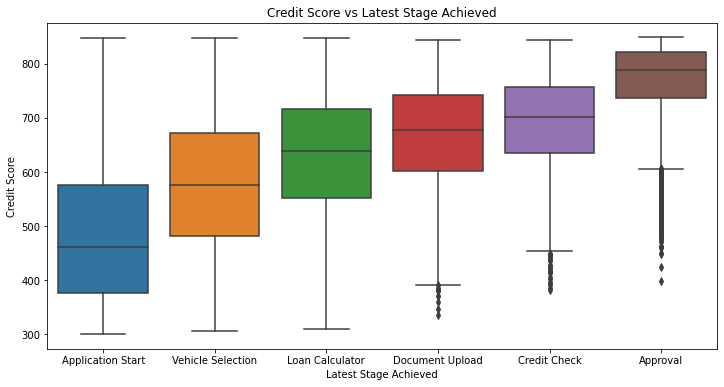

In [58]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Latest Stage', y='Credit Score', data=customer_data, order=event_sequence)
plt.title('Credit Score vs Latest Stage Achieved')
plt.xlabel('Latest Stage Achieved')
plt.ylabel('Credit Score')
plt.show()


In [59]:
education_levels = ['High School', 'Associate Degree', 'Bachelor’s Degree', 'Master’s Degree', 'Doctorate']

def generate_categorical_data(event_lengths, var_levels, var_label, strong_skew=False):
    data = []
    max_event_length = len(event_sequence)
    
    for event_length in event_lengths:
        # Calculate the probability of each education level based on event length
        if strong_skew:
            # Generate a strong skew
            probabilities = [(event_length / max_event_length) ** (i + 1) for i in range(len(var_levels))]
        else:
            probabilities = [(event_length / max_event_length) * (i + 1) / len(var_levels) for i in range(len(var_levels))]

        probabilities = np.array(probabilities)
        probabilities /= probabilities.sum()  # Normalize to make it a valid probability distribution
        
        # Select an education level based on the calculated probabilities
        education_level = np.random.choice(var_levels, p=probabilities)
        
        data.append({'Event Length': event_length, var_label: education_level})
    
    return pd.DataFrame(data)

# Generate the education-related data
event_lengths = customer_data['Event Length'].tolist()  # Get the list of event lengths from the existing DataFrame
education_df = generate_categorical_data(event_lengths, education_levels, 'Education Level', strong_skew=True)

# Merge the new education-related data with the existing DataFrame
customer_data = customer_data.reset_index(drop=True)  # Reset index to ensure proper alignment
education_df = education_df.reset_index(drop=True)  # Reset index to ensure proper alignment
customer_data = pd.concat([customer_data, education_df['Education Level']], axis=1)

# Display the first few rows of the updated DataFrame
print(customer_data.head())

   Credit Score                                             Events  Treatment  \
0           516  [Application Start, Vehicle Selection, Loan Ca...          0   
1           483                                [Application Start]          0   
2           760  [Application Start, Vehicle Selection, Loan Ca...          0   
3           835  [Application Start, Vehicle Selection, Loan Ca...          1   
4           390                                [Application Start]          0   

        Latest Stage  Event Length    Education Level  
0       Credit Check             5    Master’s Degree  
1  Application Start             1        High School  
2       Credit Check             5   Associate Degree  
3    Document Upload             4  Bachelor’s Degree  
4  Application Start             1        High School  


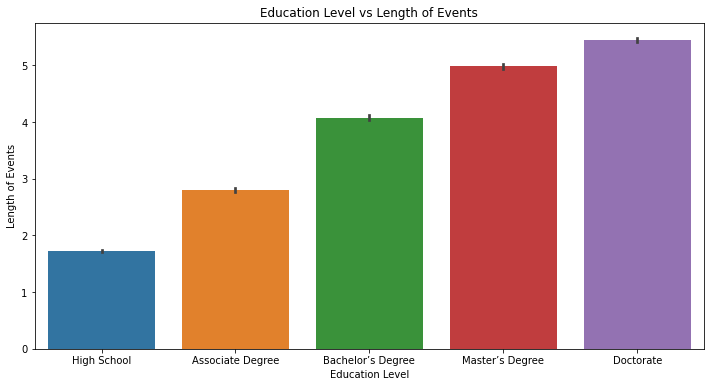

In [60]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Education Level', y='Event Length', data=customer_data, order=education_levels)
plt.title('Education Level vs Length of Events')
plt.xlabel('Education Level')
plt.ylabel('Length of Events')
plt.show()

In [62]:
#customer_data.drop('Marriage Level', axis=1, inplace=True)

In [63]:
marriage_levels=['Divorced', 'Single', 'Widowed','Married']
event_lengths = customer_data['Event Length'].tolist()  # Get the list of event lengths from the existing DataFrame
marriage_df = generate_categorical_data(event_lengths, marriage_levels, 'Marriage Level', strong_skew=True)

# Merge the new education-related data with the existing DataFrame
customer_data = customer_data.reset_index(drop=True)  # Reset index to ensure proper alignment
marriage_df = marriage_df.reset_index(drop=True)  # Reset index to ensure proper alignment
customer_data = pd.concat([customer_data, marriage_df['Marriage Level']], axis=1)

# Display the first few rows of the updated DataFrame
print(customer_data.head())

   Credit Score                                             Events  Treatment  \
0           516  [Application Start, Vehicle Selection, Loan Ca...          0   
1           483                                [Application Start]          0   
2           760  [Application Start, Vehicle Selection, Loan Ca...          0   
3           835  [Application Start, Vehicle Selection, Loan Ca...          1   
4           390                                [Application Start]          0   

        Latest Stage  Event Length    Education Level Marriage Level  
0       Credit Check             5    Master’s Degree         Single  
1  Application Start             1        High School       Divorced  
2       Credit Check             5   Associate Degree        Widowed  
3    Document Upload             4  Bachelor’s Degree        Widowed  
4  Application Start             1        High School       Divorced  


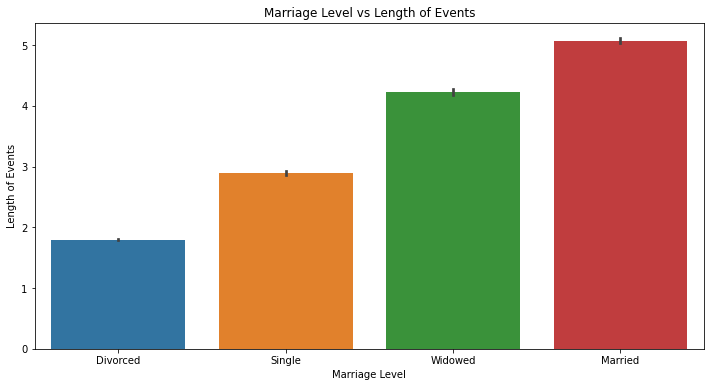

In [64]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Marriage Level', y='Event Length', data=customer_data, order=marriage_levels)
plt.title('Marriage Level vs Length of Events')
plt.xlabel('Marriage Level')
plt.ylabel('Length of Events')
plt.show()

In [66]:
#customer_data.drop('Age', axis=1, inplace=True)

In [67]:


def generate_numeric_data(event_lengths, min_val, max_val, mean, std_dev, label, skew_factor=1.0,inversely_proportional_to_mean=False):
    data = []
    max_event_length = max(event_lengths)
    
    for event_length in event_lengths:
        # Adjust the mean based on the event length and skew factor
        adjusted_mean = mean + skew_factor * (event_length / max_event_length) * (max_val - mean)
        if inversely_proportional_to_mean:
            adjusted_mean = mean - skew_factor * (event_length / max_event_length) * (mean - min_val)

        # Generate a value from a normal distribution with the adjusted mean and standard deviation
        value = np.random.normal(adjusted_mean, std_dev)
        
        # Ensure the value is within the specified range
        value = max(min_val, min(max_val, value))
        
        data.append(value)
    
    return pd.DataFrame(data, columns=[label])

# Age
event_lengths = customer_data['Event Length'].tolist()  # Get the list of event lengths from the existing DataFrame
min_val = 18
max_val = 99
mean = 38.1
std_dev = 22.7
label = 'Age'
skew_factor =.15

# Generate the numeric data
generated_df = generate_numeric_data(event_lengths, min_val, max_val, mean, std_dev, label,skew_factor=skew_factor)

# Merge the new numeric data with the existing DataFrame
customer_data = customer_data.reset_index(drop=True)  # Reset index to ensure proper alignment
generated_df = generated_df.reset_index(drop=True)  # Reset index to ensure proper alignment
customer_data = pd.concat([customer_data, generated_df], axis=1)

# Display the first few rows of the updated DataFrame
print(customer_data.head())

   Credit Score                                             Events  Treatment  \
0           516  [Application Start, Vehicle Selection, Loan Ca...          0   
1           483                                [Application Start]          0   
2           760  [Application Start, Vehicle Selection, Loan Ca...          0   
3           835  [Application Start, Vehicle Selection, Loan Ca...          1   
4           390                                [Application Start]          0   

        Latest Stage  Event Length    Education Level Marriage Level  \
0       Credit Check             5    Master’s Degree         Single   
1  Application Start             1        High School       Divorced   
2       Credit Check             5   Associate Degree        Widowed   
3    Document Upload             4  Bachelor’s Degree        Widowed   
4  Application Start             1        High School       Divorced   

         Age  
0  60.201771  
1  62.905982  
2  18.050318  
3  44.957203  
4  22

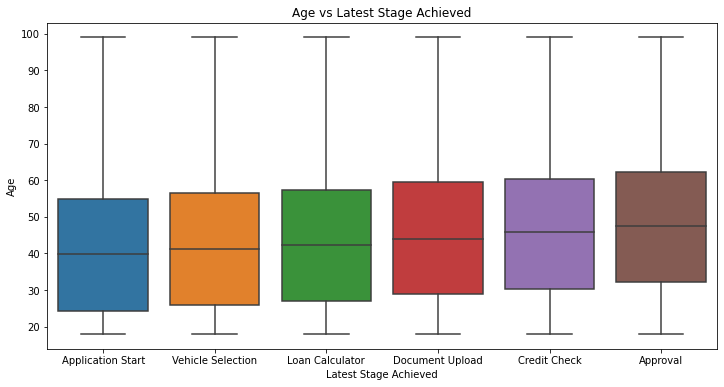

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Latest Stage', y='Age', data=customer_data, order=event_sequence)
plt.title('Age vs Latest Stage Achieved')
plt.xlabel('Latest Stage Achieved')
plt.ylabel('Age')
plt.show()


In [72]:
customer_data.drop('Vehicle_Year', axis=1, inplace=True)

In [73]:
# Age
# label = 'Vehicle_Year'
# event_lengths = customer_data['Event Length'].tolist()  # Get the list of event lengths from the existing DataFrame
# min_val = customer_loan[label].min()
# max_val = customer_loan[label].max()
# mean = customer_loan[label].mean()
# std_dev = customer_loan[label].std()
# skew_factor =.65
# inversely_proportional_to_mean=True

event_lengths = customer_data['Event Length'].tolist()  # Get the list of event lengths from the existing DataFrame
min_val = 1995
max_val = 2024
mean = 2022
std_dev = 2
label = 'Vehicle_Year'
skew_factor =.05
inversely_proportional_to_mean=True
generated_df = generate_numeric_data(event_lengths, min_val, max_val, mean, std_dev, label,skew_factor,inversely_proportional_to_mean)

# Merge the new numeric data with the existing DataFrame
customer_data = customer_data.reset_index(drop=True)  # Reset index to ensure proper alignment
generated_df = generated_df.reset_index(drop=True)  # Reset index to ensure proper alignment
customer_data = pd.concat([customer_data, generated_df], axis=1)

# Display the first few rows of the updated DataFrame
print(customer_data.head())

   Credit Score                                             Events  Treatment  \
0           516  [Application Start, Vehicle Selection, Loan Ca...          0   
1           483                                [Application Start]          0   
2           760  [Application Start, Vehicle Selection, Loan Ca...          0   
3           835  [Application Start, Vehicle Selection, Loan Ca...          1   
4           390                                [Application Start]          0   

        Latest Stage  Event Length    Education Level Marriage Level  \
0       Credit Check             5    Master’s Degree         Single   
1  Application Start             1        High School       Divorced   
2       Credit Check             5   Associate Degree        Widowed   
3    Document Upload             4  Bachelor’s Degree        Widowed   
4  Application Start             1        High School       Divorced   

         Age  Vehicle_Year  
0  60.201771   2022.745019  
1  62.905982   2022.54

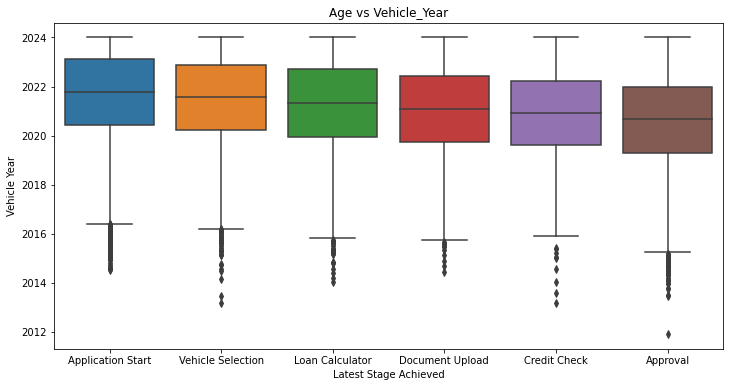

In [74]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Latest Stage', y='Vehicle_Year', data=customer_data, order=event_sequence)
plt.title('Age vs Vehicle_Year')
plt.xlabel('Latest Stage Achieved')
plt.ylabel('Vehicle Year')
plt.show()


In [158]:
#customer_data.drop('Loan_Amount', axis=1, inplace=True)

   Credit Score                                             Events  Treatment  \
0           516  [Application Start, Vehicle Selection, Loan Ca...          0   
1           483                                [Application Start]          0   
2           760  [Application Start, Vehicle Selection, Loan Ca...          0   
3           835  [Application Start, Vehicle Selection, Loan Ca...          1   
4           390                                [Application Start]          0   

        Latest Stage  Event Length    Education Level Marriage Level  \
0       Credit Check             5    Master’s Degree         Single   
1  Application Start             1        High School       Divorced   
2       Credit Check             5   Associate Degree        Widowed   
3    Document Upload             4  Bachelor’s Degree        Widowed   
4  Application Start             1        High School       Divorced   

         Age  Vehicle_Year   Loan_Amount  
0  60.201771   2022.745019  25597.974

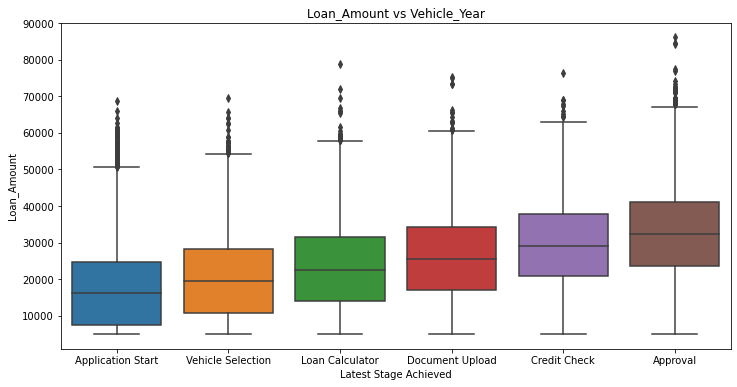

In [76]:

event_lengths = customer_data['Event Length'].tolist()  # Get the list of event lengths from the existing DataFrame
min_val = 5002
max_val = 110_000
mean = 12955.523226
std_dev = 12955.523226
label = 'Loan_Amount'
skew_factor =0.2
inversely_proportional_to_mean=False
# Generate the numeric data
generated_df = generate_numeric_data(event_lengths, min_val, max_val, mean, std_dev, label,skew_factor,inversely_proportional_to_mean)

# Merge the new numeric data with the existing DataFrame
customer_data = customer_data.reset_index(drop=True)  # Reset index to ensure proper alignment
generated_df = generated_df.reset_index(drop=True)  # Reset index to ensure proper alignment
customer_data = pd.concat([customer_data, generated_df], axis=1)

# Display the first few rows of the updated DataFrame
print(customer_data.head())
plt.figure(figsize=(12, 6))
sns.boxplot(x='Latest Stage', y=label, data=customer_data, order=event_sequence)
plt.title(f'{label} vs Vehicle_Year')
plt.xlabel('Latest Stage Achieved')
plt.ylabel(f'{label}')
plt.show()


   Credit Score                                             Events  Treatment  \
0           516  [Application Start, Vehicle Selection, Loan Ca...          0   
1           483                                [Application Start]          0   
2           760  [Application Start, Vehicle Selection, Loan Ca...          0   
3           835  [Application Start, Vehicle Selection, Loan Ca...          1   
4           390                                [Application Start]          0   

        Latest Stage  Event Length    Education Level Marriage Level  \
0       Credit Check             5    Master’s Degree         Single   
1  Application Start             1        High School       Divorced   
2       Credit Check             5   Associate Degree        Widowed   
3    Document Upload             4  Bachelor’s Degree        Widowed   
4  Application Start             1        High School       Divorced   

         Age  Vehicle_Year   Loan_Amount  Down_Payment  
0  60.201771   2022.745

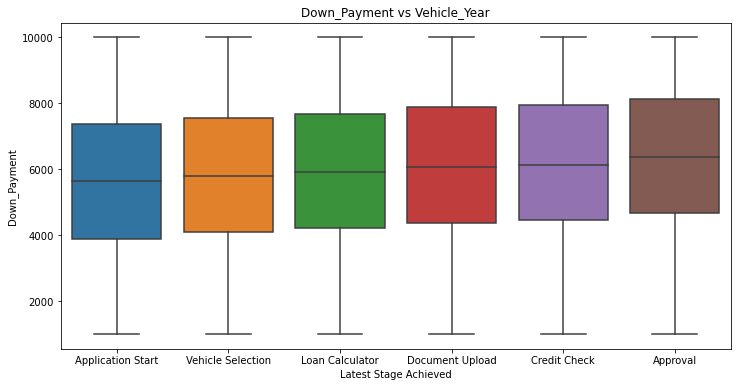

In [77]:
# count    70000.000000
# mean      5505.573014
# std       2593.084494
# min       1000.000000
# 25%       3257.750000
# 50%       5508.000000
# 75%       7735.250000
# max       9999.000000

event_lengths = customer_data['Event Length'].tolist()  # Get the list of event lengths from the existing DataFrame
min_val = 1000
max_val = 9999
mean = 5505.573014
std_dev = 2593.084494
label = 'Down_Payment'
skew_factor =0.2
inversely_proportional_to_mean=False
# Generate the numeric data
generated_df = generate_numeric_data(event_lengths, min_val, max_val, mean, std_dev, label,skew_factor,inversely_proportional_to_mean)

# Merge the new numeric data with the existing DataFrame
customer_data = customer_data.reset_index(drop=True)  # Reset index to ensure proper alignment
generated_df = generated_df.reset_index(drop=True)  # Reset index to ensure proper alignment
customer_data = pd.concat([customer_data, generated_df], axis=1)

# Display the first few rows of the updated DataFrame
print(customer_data.head())
plt.figure(figsize=(12, 6))
sns.boxplot(x='Latest Stage', y=label, data=customer_data, order=event_sequence)
plt.title(f'{label} vs Vehicle_Year')
plt.xlabel('Latest Stage Achieved')
plt.ylabel(f'{label}')
plt.show()

   Credit Score                                             Events  Treatment  \
0           516  [Application Start, Vehicle Selection, Loan Ca...          0   
1           483                                [Application Start]          0   
2           760  [Application Start, Vehicle Selection, Loan Ca...          0   
3           835  [Application Start, Vehicle Selection, Loan Ca...          1   
4           390                                [Application Start]          0   

        Latest Stage  Event Length    Education Level Marriage Level  \
0       Credit Check             5    Master’s Degree         Single   
1  Application Start             1        High School       Divorced   
2       Credit Check             5   Associate Degree        Widowed   
3    Document Upload             4  Bachelor’s Degree        Widowed   
4  Application Start             1        High School       Divorced   

         Age  Vehicle_Year   Loan_Amount  Down_Payment  Loan_Tenure_Years  
0  6

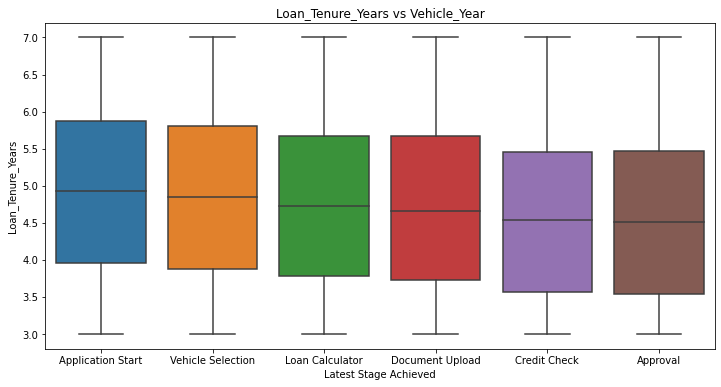

In [78]:
# count    70000.000000
# mean         5.000071
# std          1.414259
# min          3.000000
# 25%          4.000000
# 50%          5.000000
# 75%          6.000000
# max          7.000000
label = 'Loan_Tenure_Years'
min_val = 3.0
max_val = 7.0
mean = 5.000071
std_dev = 1.424259
skew_factor =0.25
inversely_proportional_to_mean=True
# Generate the numeric data
generated_df = generate_numeric_data(event_lengths, min_val, max_val, mean, std_dev, label,skew_factor,inversely_proportional_to_mean)

# Merge the new numeric data with the existing DataFrame
customer_data = customer_data.reset_index(drop=True)  # Reset index to ensure proper alignment
generated_df = generated_df.reset_index(drop=True)  # Reset index to ensure proper alignment
customer_data = pd.concat([customer_data, generated_df], axis=1)

# Display the first few rows of the updated DataFrame
print(customer_data.head())
plt.figure(figsize=(12, 6))
sns.boxplot(x='Latest Stage', y=label, data=customer_data, order=event_sequence)
plt.title(f'{label} vs Vehicle_Year')
plt.xlabel('Latest Stage Achieved')
plt.ylabel(f'{label}')
plt.show()

In [79]:
customer_loan['Interest_Rate'].describe()

count    70000.000000
mean         4.198822
std          1.329143
min          1.900000
25%          3.047500
50%          4.200000
75%          5.350000
max          6.500000
Name: Interest_Rate, dtype: float64

   Credit Score                                             Events  Treatment  \
0           516  [Application Start, Vehicle Selection, Loan Ca...          0   
1           483                                [Application Start]          0   
2           760  [Application Start, Vehicle Selection, Loan Ca...          0   
3           835  [Application Start, Vehicle Selection, Loan Ca...          1   
4           390                                [Application Start]          0   

        Latest Stage  Event Length    Education Level Marriage Level  \
0       Credit Check             5    Master’s Degree         Single   
1  Application Start             1        High School       Divorced   
2       Credit Check             5   Associate Degree        Widowed   
3    Document Upload             4  Bachelor’s Degree        Widowed   
4  Application Start             1        High School       Divorced   

         Age  Vehicle_Year   Loan_Amount  Down_Payment  Loan_Tenure_Years  \
0  

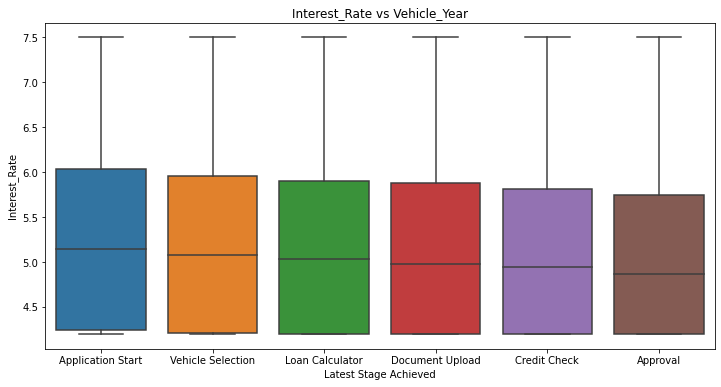

In [80]:
label = 'Interest_Rate'
min_val = 4.198822
max_val = 7.5
mean = 5.198822
std_dev = 1.3291
skew_factor =0.35
inversely_proportional_to_mean=True
# Generate the numeric data
generated_df = generate_numeric_data(event_lengths, min_val, max_val, mean, std_dev, label,skew_factor,inversely_proportional_to_mean)

# Merge the new numeric data with the existing DataFrame
customer_data = customer_data.reset_index(drop=True)  # Reset index to ensure proper alignment
generated_df = generated_df.reset_index(drop=True)  # Reset index to ensure proper alignment
customer_data = pd.concat([customer_data, generated_df], axis=1)

# Display the first few rows of the updated DataFrame
print(customer_data.head())
plt.figure(figsize=(12, 6))
sns.boxplot(x='Latest Stage', y=label, data=customer_data, order=event_sequence)
plt.title(f'{label} vs Vehicle_Year')
plt.xlabel('Latest Stage Achieved')
plt.ylabel(f'{label}')
plt.show()

In [81]:
#- Session_Duration_Minutes
#- Number_of_Interactions
customer_loan['Session_Duration_Minutes'].describe()

count    70000.000000
mean        31.972329
std         15.851095
min          5.000000
25%         18.000000
50%         32.000000
75%         46.000000
max         59.000000
Name: Session_Duration_Minutes, dtype: float64

In [82]:
customer_loan['Session_Duration_Minutes'].mean()
customer_loan['Session_Duration_Minutes'].min()
customer_loan['Session_Duration_Minutes'].max()
customer_loan['Session_Duration_Minutes'].std()

15.851094895780657

In [159]:
#customer_data.drop('Session_Duration_Minutes', axis=1, inplace=True)

   Credit Score                                             Events  Treatment  \
0           516  [Application Start, Vehicle Selection, Loan Ca...          0   
1           483                                [Application Start]          0   
2           760  [Application Start, Vehicle Selection, Loan Ca...          0   
3           835  [Application Start, Vehicle Selection, Loan Ca...          1   
4           390                                [Application Start]          0   

        Latest Stage  Event Length    Education Level Marriage Level  \
0       Credit Check             5    Master’s Degree         Single   
1  Application Start             1        High School       Divorced   
2       Credit Check             5   Associate Degree        Widowed   
3    Document Upload             4  Bachelor’s Degree        Widowed   
4  Application Start             1        High School       Divorced   

         Age  Vehicle_Year   Loan_Amount  Down_Payment  Loan_Tenure_Years  \
0  

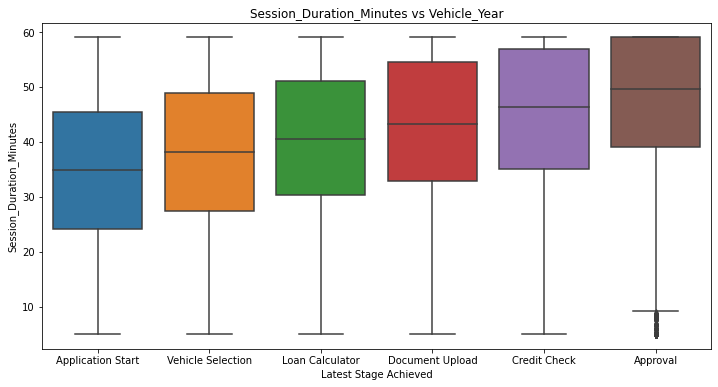

In [84]:
label = 'Session_Duration_Minutes'
min_val = customer_loan[label].min()
max_val = customer_loan[label].max()
mean = customer_loan[label].mean()
std_dev = customer_loan[label].std()
skew_factor =.65
inversely_proportional_to_mean=False
# Generate the numeric data
generated_df = generate_numeric_data(event_lengths, min_val, max_val, mean, std_dev, label,skew_factor,inversely_proportional_to_mean)

# Merge the new numeric data with the existing DataFrame
customer_data = customer_data.reset_index(drop=True)  # Reset index to ensure proper alignment
generated_df = generated_df.reset_index(drop=True)  # Reset index to ensure proper alignment
customer_data = pd.concat([customer_data, generated_df], axis=1)

# Display the first few rows of the updated DataFrame
print(customer_data.head())
plt.figure(figsize=(12, 6))
sns.boxplot(x='Latest Stage', y=label, data=customer_data, order=event_sequence)
plt.title(f'{label} vs Vehicle_Year')
plt.xlabel('Latest Stage Achieved')
plt.ylabel(f'{label}')
plt.show()

   Credit Score                                             Events  Treatment  \
0           516  [Application Start, Vehicle Selection, Loan Ca...          0   
1           483                                [Application Start]          0   
2           760  [Application Start, Vehicle Selection, Loan Ca...          0   
3           835  [Application Start, Vehicle Selection, Loan Ca...          1   
4           390                                [Application Start]          0   

        Latest Stage  Event Length    Education Level Marriage Level  \
0       Credit Check             5    Master’s Degree         Single   
1  Application Start             1        High School       Divorced   
2       Credit Check             5   Associate Degree        Widowed   
3    Document Upload             4  Bachelor’s Degree        Widowed   
4  Application Start             1        High School       Divorced   

         Age  Vehicle_Year   Loan_Amount  Down_Payment  Loan_Tenure_Years  \
0  

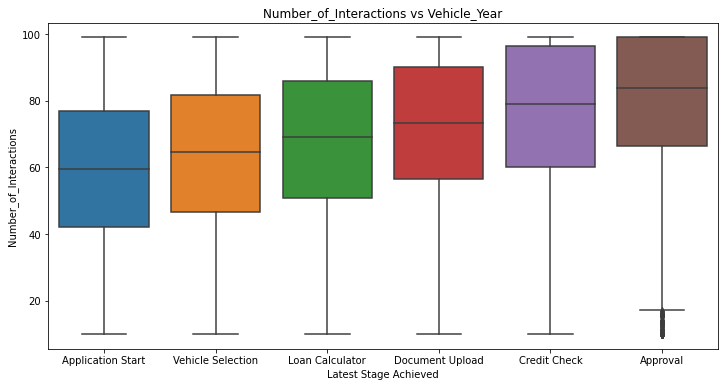

In [85]:
label = 'Number_of_Interactions'
min_val = customer_loan[label].min()
max_val = customer_loan[label].max()
mean = customer_loan[label].mean()
std_dev = customer_loan[label].std()
skew_factor =.65
inversely_proportional_to_mean=False
# Generate the numeric data
generated_df = generate_numeric_data(event_lengths, min_val, max_val, mean, std_dev, label,skew_factor,inversely_proportional_to_mean)

# Merge the new numeric data with the existing DataFrame
customer_data = customer_data.reset_index(drop=True)  # Reset index to ensure proper alignment
generated_df = generated_df.reset_index(drop=True)  # Reset index to ensure proper alignment
customer_data = pd.concat([customer_data, generated_df], axis=1)

# Display the first few rows of the updated DataFrame
print(customer_data.head())
plt.figure(figsize=(12, 6))
sns.boxplot(x='Latest Stage', y=label, data=customer_data, order=event_sequence)
plt.title(f'{label} vs Vehicle_Year')
plt.xlabel('Latest Stage Achieved')
plt.ylabel(f'{label}')
plt.show()

In [148]:
customer_data.drop('Session_DateTime', axis=1, inplace=True)

In [90]:
# from datetime import datetime, timedelta

# def generate_random_datetimes(num_samples, mean_datetime, median_datetime, std_dev_days):
#     # Convert mean and median to datetime objects if they are not already
#     if isinstance(mean_datetime, str):
#         mean_datetime = datetime.strptime(mean_datetime, '%Y-%m-%d %H:%M:%S')
#     if isinstance(median_datetime, str):
#         median_datetime = datetime.strptime(median_datetime, '%Y-%m-%d %H:%M:%S')
    
#     # Calculate the mean timestamp in seconds since epoch
#     mean_timestamp = mean_datetime.timestamp()
    
#     # Generate random timestamps from a normal distribution
#     random_timestamps = np.random.normal(loc=mean_timestamp, scale=std_dev_days * 86400, size=num_samples)
    
#     # Convert timestamps back to datetime objects
#     random_datetimes = [datetime.fromtimestamp(ts) for ts in random_timestamps]
    
#     return pd.DataFrame(random_datetimes, columns=['Session_DateTime'])

# # Example usage
# num_samples = len(customer_data)  # Number of samples should match the existing DataFrame
# mean_datetime = '2023-06-01 12:00:00'
# median_datetime = '2023-07-01 12:00:00'
# std_dev_days = 180

# # Generate the random datetime data
# generated_df = generate_random_datetimes(num_samples, mean_datetime, median_datetime, std_dev_days)

# # Merge the new datetime data with the existing DataFrame
# customer_data = customer_data.reset_index(drop=True)  # Reset index to ensure proper alignment
# generated_df = generated_df.reset_index(drop=True)  # Reset index to ensure proper alignment
# customer_data = pd.concat([customer_data, generated_df], axis=1)

# # Display the first few rows of the updated DataFrame
# print(customer_data.head())

In [149]:
from datetime import datetime, timedelta
import random

# List of US holidays (example)
us_holidays = [
    '2022-01-01',
    '2022-02-21',
    '2022-05-30',
    '2022-07-04',
    '2022-09-05',
    '2022-11-11',
    '2022-11-24',
    '2022-12-25',
    '2023-01-01',  # New Year's Day
    '2023-02-20',  # Presidents' Day
    '2023-05-29',  # Memorial Day
    '2023-07-04',  # Independence Day
    '2023-09-04',  # Labor Day
    '2023-11-11',  # Veterans Day
    '2023-11-23',  # Thanksgiving Day
    '2023-12-25',  # Christmas Day
 
    
    # Add more holidays as needed
]

# Convert holidays to datetime objects
us_holidays = [datetime.strptime(date, '%Y-%m-%d') for date in us_holidays]

def generate_random_datetimes_with_holidays(num_samples, start_date, end_date, holiday_spike_factor=10):
    # Convert start and end dates to datetime objects if they are not already
    if isinstance(start_date, str):
        start_date = datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')
    if isinstance(end_date, str):
        end_date = datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S')
    
    # Calculate the total number of seconds in the range
    total_seconds = int((end_date - start_date).total_seconds())
    
    random_datetimes = []
    
    for _ in range(num_samples):
        if random.random() < holiday_spike_factor / (holiday_spike_factor + 1):
            # Choose a holiday and add a small random offset
            holiday = random.choice(us_holidays)
            offset = timedelta(seconds=random.randint(-86400, 86400))  # +/- 1 day
            random_datetime = holiday + offset
        else:
            # Generate a random datetime uniformly within the range
            random_seconds = random.randint(0, total_seconds)
            random_datetime = start_date + timedelta(seconds=random_seconds)
        
        random_datetimes.append(random_datetime)
    
    return pd.DataFrame(random_datetimes, columns=['Session_DateTime'])

# Example usage
num_samples = len(customer_data)  # Number of samples should match the existing DataFrame
start_date = '2022-01-01 00:00:00'
end_date = '2023-12-31 23:59:59'
holiday_spike_factor = .25  # Increase this factor to add more spikes around holidays

# Generate the random datetime data
generated_df = generate_random_datetimes_with_holidays(num_samples, start_date, end_date, holiday_spike_factor)

# Merge the new datetime data with the existing DataFrame
customer_data = customer_data.reset_index(drop=True)  # Reset index to ensure proper alignment
generated_df = generated_df.reset_index(drop=True)  # Reset index to ensure proper alignment
customer_data = pd.concat([customer_data, generated_df], axis=1)

# Display the first few rows of the updated DataFrame
print(customer_data.head())

   Credit Score                                             Events  Treatment  \
0           516  [Application Start, Vehicle Selection, Loan Ca...          0   
1           483                                [Application Start]          0   
2           760  [Application Start, Vehicle Selection, Loan Ca...          0   
3           835  [Application Start, Vehicle Selection, Loan Ca...          1   
4           390                                [Application Start]          0   

        Latest Stage  Event Length    Education Level Marriage Level  \
0       Credit Check             5    Master’s Degree         Single   
1  Application Start             1        High School       Divorced   
2       Credit Check             5   Associate Degree        Widowed   
3    Document Upload             4  Bachelor’s Degree        Widowed   
4  Application Start             1        High School       Divorced   

         Age  Vehicle_Year   Loan_Amount  Down_Payment  Loan_Tenure_Years  \
0  

In [150]:
customer_data.head()

,Credit Score,Events,Treatment,Latest Stage,Event Length,Education Level,Marriage Level,Age,Vehicle_Year,Loan_Amount,Down_Payment,Loan_Tenure_Years,Interest_Rate,Session_Duration_Minutes,Number_of_Interactions,Date,Session_DateTime
0,516,"[Application Start, Vehicle Selection, Loan Ca...",0,Credit Check,5,Master’s Degree,Single,60.201771,2022.745019,25597.974379,5748.082665,5.239801,4.198822,49.437441,53.923680,2023-12-28,2022-09-05 08:37:54
1,483,[Application Start],0,Application Start,1,High School,Divorced,62.905982,2022.541608,12258.223905,6775.227438,5.457483,4.583617,29.860501,40.497471,2023-06-01,2022-04-04 03:07:37
2,760,"[Application Start, Vehicle Selection, Loan Ca...",0,Credit Check,5,Associate Degree,Widowed,18.050318,2021.521410,48485.718543,7547.271700,5.021393,4.198822,31.283551,80.153289,2022-12-28,2023-09-04 23:29:14
3,835,"[Application Start, Vehicle Selection, Loan Ca...",1,Document Upload,4,Bachelor’s Degree,Widowed,44.957203,2018.901095,42317.108949,4385.839985,4.158795,4.198822,38.154065,99.000000,2023-04-21,2022-04-25 15:00:36
4,390,[Application Start],0,Application Start,1,High School,Divorced,22.515580,2021.295322,7420.069980,5006.056088,7.000000,6.484031,40.826849,14.190096,2022-11-28,2023-10-15 16:27:37


In [151]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72000 entries, 0 to 71999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Credit Score              72000 non-null  int64         
 1   Events                    72000 non-null  object        
 2   Treatment                 72000 non-null  int64         
 3   Latest Stage              72000 non-null  object        
 4   Event Length              72000 non-null  int64         
 5   Education Level           72000 non-null  object        
 6   Marriage Level            72000 non-null  object        
 7   Age                       72000 non-null  float64       
 8   Vehicle_Year              72000 non-null  float64       
 9   Loan_Amount               72000 non-null  float64       
 10  Down_Payment              72000 non-null  float64       
 11  Loan_Tenure_Years         72000 non-null  float64       
 12  Interest_Rate     

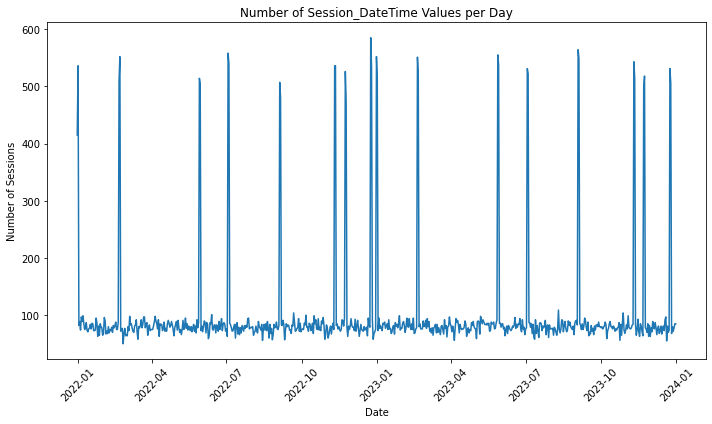

In [152]:
customer_data['Date'] = customer_data['Session_DateTime'].dt.date

# Count the number of occurrences per day
daily_counts = customer_data.groupby('Date').size().reset_index(name='Counts')

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_counts, x='Date', y='Counts')
plt.title('Number of Session_DateTime Values per Day')
plt.xlabel('Date')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [153]:
customer_data.Session_DateTime.describe()

/tmp/ipykernel_483329/881105244.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  customer_data.Session_DateTime.describe()


count                   72000
unique                  71926
top       2023-11-22 10:13:09
freq                        3
first     2021-12-31 00:02:29
last      2023-12-31 23:42:43
Name: Session_DateTime, dtype: object

<AxesSubplot:>

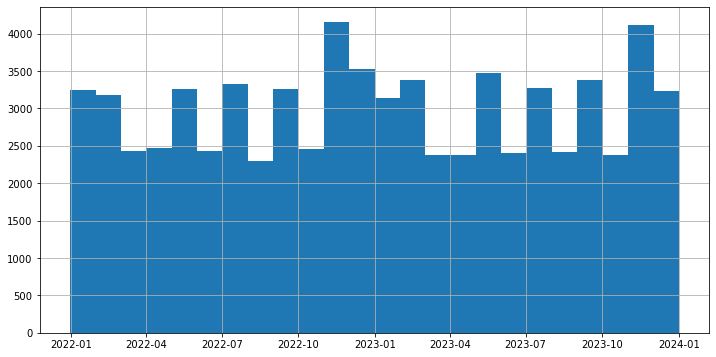

In [154]:
plt.figure(figsize=(12, 6))
customer_data.Session_DateTime.hist(bins=24)

In [155]:
customer_data.to_csv('../data/Synthetic_Auto_Loan_Application_Data_With_Treatment_and_Logical_Timestamp_DPV.csv', index=False)

In [130]:
len(customer_data.columns)

15

In [156]:
customer_data.columns

Index(['Credit Score', 'Events', 'Treatment', 'Latest Stage', 'Event Length',
       'Education Level', 'Marriage Level', 'Age', 'Vehicle_Year',
       'Loan_Amount', 'Down_Payment', 'Loan_Tenure_Years', 'Interest_Rate',
       'Session_Duration_Minutes', 'Number_of_Interactions', 'Date',
       'Session_DateTime'],
      dtype='object')

In [157]:
#customer_data.drop('Session_DateTime', axis=1, inplace=True)

In [ ]:
# OK, let's not do normal!
# from datetime import datetime, timedelta
# import random

# # List of US holidays (example)
# us_holidays = [
#     '2023-01-01',  # New Year's Day
#     '2023-07-04',  # Independence Day
#     '2023-12-25',  # Christmas Day
#     # Add more holidays as needed
# ]

# # Convert holidays to datetime objects
# us_holidays = [datetime.strptime(date, '%Y-%m-%d') for date in us_holidays]

# def generate_random_datetimes_with_holidays(num_samples, start_date, end_date, holiday_spike_factor=10):
#     # Convert start and end dates to datetime objects if they are not already
#     if isinstance(start_date, str):
#         start_date = datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')
#     if isinstance(end_date, str):
#         end_date = datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S')
    
#     # Calculate the total number of seconds in the range
#     total_seconds = int((end_date - start_date).total_seconds())
    
#     random_datetimes = []
    
#     for _ in range(num_samples):
#         if random.random() < holiday_spike_factor / (holiday_spike_factor + 1):
#             # Choose a holiday and add a small random offset
#             holiday = random.choice(us_holidays)
#             offset = timedelta(seconds=random.randint(-86400, 86400))  # +/- 1 day
#             random_datetime = holiday + offset
#         else:
#             # Generate a random datetime uniformly within the range
#             random_seconds = random.randint(0, total_seconds)
#             random_datetime = start_date + timedelta(seconds=random_seconds)
        
#         random_datetimes.append(random_datetime)
    
#     return pd.DataFrame(random_datetimes, columns=['Session_DateTime'])

# # Example usage
# num_samples = len(customer_data)  # Number of samples should match the existing DataFrame
# start_date = '2023-01-01 00:00:00'
# end_date = '2023-12-31 23:59:59'
# holiday_spike_factor = 10  # Increase this factor to add more spikes around holidays

# # Generate the random datetime data
# generated_df = generate_random_datetimes_with_holidays(num_samples, start_date, end_date, holiday_spike_factor)

# # Merge the new datetime data with the existing DataFrame
# customer_data = customer_data.reset_index(drop=True)  # Reset index to ensure proper alignment
# generated_df = generated_df.reset_index(drop=True)  # Reset index to ensure proper alignment
# customer_data = pd.concat([customer_data, generated_df], axis=1)

# # Display the first few rows of the updated DataFrame
# print(customer_data.head())